In [2]:
#Import Necessary Packages
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import scipy.stats as stats
import numpy as np

After completing the Data Wrangling steps in the first notebook, we can load in our cleaned and combined dataframes from the CSV files we stored them in and begin to work on some EDA (exploratory data analysis) to answer questions we have regarding the data.

In [3]:
#Load in dataframes created in the Data Wrangling portion
df_2016 = pd.read_csv('recycling_districts_2016')
df = pd.read_csv('recycling_districts_all')
df_month = pd.read_csv('recycling_districts_monthly')

The 3 dataframes loaded above include the combined datasets of NYC recycling rates and NYC community district level demographic data. The main dataset that will be used in EDA and to build a ML model is the 2016 data (df_2016) since we do not have district level demographic data for all of the time periods included in the NYC recycling rates dataset (2016-2019). Since the district level data is based on 5-year estimates from 2012-2016, the 2016 recycling data most closely matches this for analysis.

Additionally, I have loaded in the dataframe containing the recyling data beyond 2016 (df and df_month) since we can still use it to compare the changes in rates over time - ie. time as a univariate relationship.

The NYC recycling dataset includes not only annual data, but monthly data from 2016-2020. As such the two additional dataframes - 'df' and 'df_month' - can be used to examine the relationship time has over recycling rates. The monthly data allows us enough points to visualize the overall distribution in scatter plot as shown below.

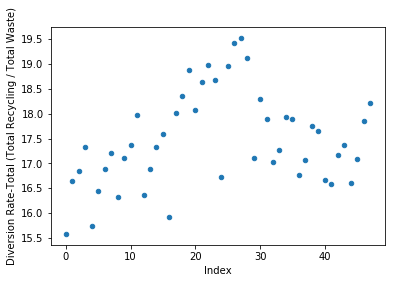

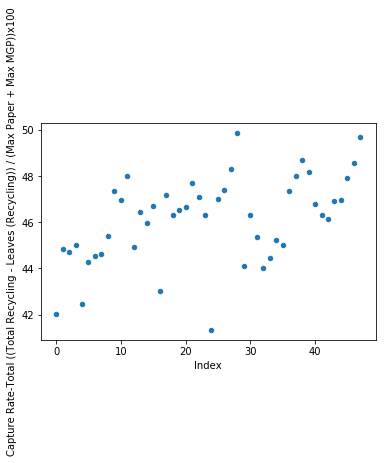

In [74]:
#Plot diversion and capture rates across months
df_month.plot(x='Index', y='Diversion Rate-Total (Total Recycling / Total Waste)', kind='scatter')
df_month.plot(x='Index', y='Capture Rate-Total ((Total Recycling - Leaves (Recycling)) / (Max Paper + Max MGP))x100', kind='scatter')
plt.show()
#df_month[['FullDate', 'Diversion Rate-Total (Total Recycling / Total Waste)']]

As you can see in the scatter plot above, the overall trend is positive as the rates increase from months January 2016 through December 2019, with a few dips and outliers mixed in. We now want to measure the pearson correlation coefficient to better quantify what degress of positive correlation. As shown below, both Diversion and Capture rates show a slight positive correlation to time, but of the two, only capture rate is statistically significant with a p-value below .05. This suggests that recycling habits may be improving throughout the city steadily.

In [79]:
#Correlation and p-value of time vs diversion & capture rate
print(stats.pearsonr(df_month['Index'], df_month['Diversion Rate-Total (Total Recycling / Total Waste)']))
print(stats.pearsonr(df_month['Index'], df_month['Capture Rate-Total ((Total Recycling - Leaves (Recycling)) / (Max Paper + Max MGP))x100']))

(0.25915055627812239, 0.075298074868220641)
(0.48457512501541089, 0.00048275827369706167)


While we were able to take a quick look at the changes of diversion and capture rates through time in months in the previous scatter plot, the df_months dataframe aggregated the district level data to an average for each month. As such we aren't able to see how the distribution of rates may vary across the 5 NYC boroughs and 59 districts. In order to preserve the district level data as well as the changes over time, the other dataframe loaded ('df') contains annual data averaged by month for the years 2016-2019 combined with district data.

With this dataframe, we can take a look on a larger scale of how the rates changed in a 4-year span along with the distribution across districts. For this, we can draw a box plot which can show the percentile distribution of rates across all 59 districts broken down by year.

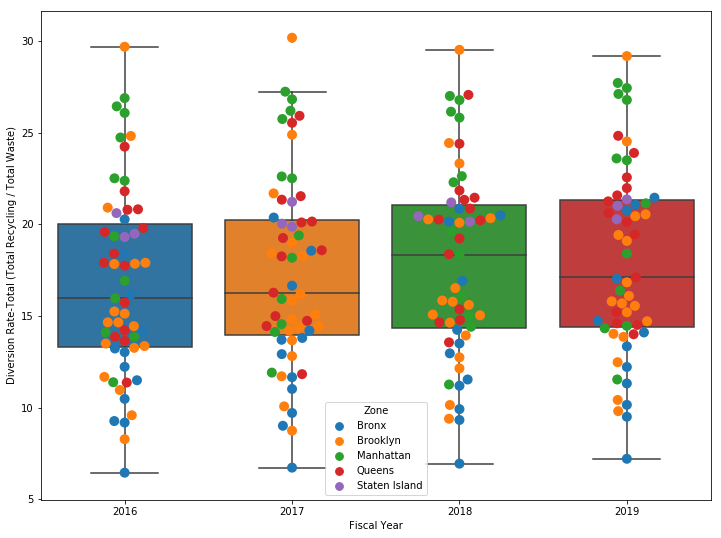

In [22]:
#Visualize the Diversion Rates over time from 2016-2019
sns.boxplot(x='Fiscal Year', y='Diversion Rate-Total (Total Recycling / Total Waste)', data=df)
sns.swarmplot(data=df, x='Fiscal Year', y='Diversion Rate-Total (Total Recycling / Total Waste)', size=10, hue='Zone')
plt.rcParams['figure.figsize'] = [10, 8]
plt.show()

The above plot display the percentile distributions of diversion rates for each year with color coding to show the breakdown of each point into the NYC borough/zone they are in. The box specifically shows where the middle 50% of the rates in a single year are between, around 13-22. Based on the upper and lower boundaries of the box (representing the 25th and 75th percentiles) we can see clearly that the diversion rates are moving slowly incrementally upwards towards 15 and 22, moving the middle 50% upward.

However, based on the median rates, there appears to be a dip from 2018 to 2019 after an initial jump from 2017. This is possibly due to there being more outliers, or points above the 75th percentile in 2018. Let's next take a look at the total capture rates in the same manner.

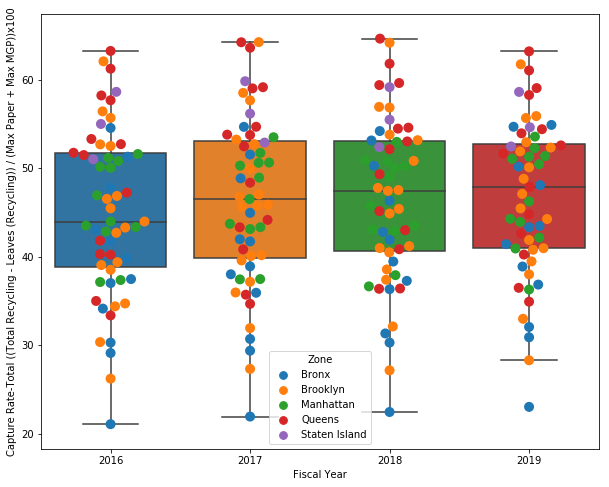

In [8]:
#Visualize the Capture Rates Total over time from 2016-2019
sns.boxplot(x='Fiscal Year', y='Capture Rate-Total ((Total Recycling - Leaves (Recycling)) / (Max Paper + Max MGP))x100', data=df)
sns.swarmplot(data=df, x='Fiscal Year', y='Capture Rate-Total ((Total Recycling - Leaves (Recycling)) / (Max Paper + Max MGP))x100', size=10, hue='Zone')
plt.rcParams['figure.figsize'] = [10, 8]
plt.show()

Based on the plot above, here there appears to be a more distinct positive trend with the median capture rates along with the upper and lower percentiles increasing each year by a few points. Since capture rate measures the total recyclable material produced successfully recycled, this suggests that tendency to recycle materials that are known to be recyclable is increasing. 

We would likely need more data to explore the dip in capture rates, but given the outliers, one possibility is that the percentage of waste materials to recyclable material may have increased in certain districts due to costs or need for non-renewable resources.



While the box plots do show a breakdown of points by borough/zone based on the legend, it does beg the question as to what the overall distribution of rates across each borough is, and if each borough has a different distribution than the others. To explore this, we can similarly draw box plots for each zone in a single year. As mentioned previously, since we do not have demographic data from 2017-2019, we will isolate the 2016 data from the 'df_2016' to explore district data moving forward. 

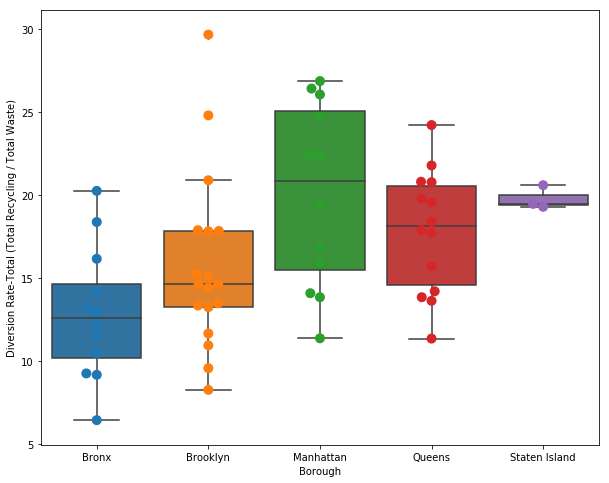

In [9]:
#Visualize the Diversion Rates in 2016 Across Boroughs
sns.boxplot(x='Zone', y='Diversion Rate-Total (Total Recycling / Total Waste)', data=df_2016)
sns.swarmplot(data=df_2016, x='Zone', y='Diversion Rate-Total (Total Recycling / Total Waste)', size=10)
plt.xlabel('Borough')
plt.rcParams['figure.figsize'] = [10, 8]
plt.show()

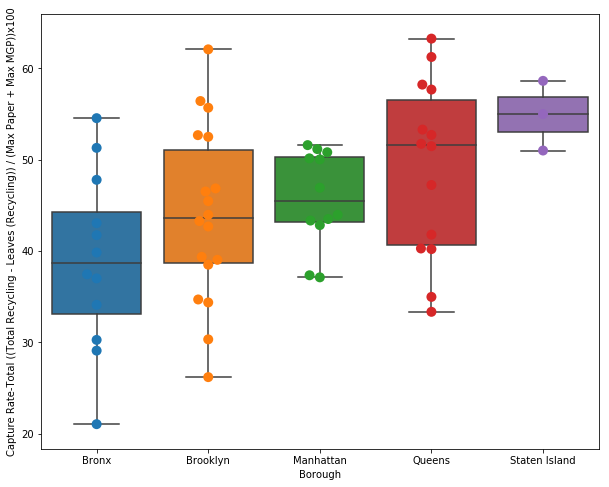

In [10]:
#Visualize the Capture Rates in 2016 Across Boroughs
sns.boxplot(x='Zone', y='Capture Rate-Total ((Total Recycling - Leaves (Recycling)) / (Max Paper + Max MGP))x100', data=df_2016)
sns.swarmplot(data=df_2016, x='Zone', y='Capture Rate-Total ((Total Recycling - Leaves (Recycling)) / (Max Paper + Max MGP))x100', size=10)
plt.xlabel('Borough')
plt.rcParams['figure.figsize'] = [10, 8]

plt.show()

As we can see in the plots above, there is a clear difference in distribution between the 5 boroughs. This suggests that there is more to explore with regards to the district data demographic, community, and economic indicators across the boroughs. 

Given that two of the major categories of indicators include age groups and races, both of which can be seen as a percentage of the total, it leads the question of what the percentage distribution of race and age are across the boroughs. Knowing this may give us further insight into potential factors of a community influence the collective success of their recycling programs.

Below we are creating separate dataframes with the 5 race groups (White, Black, Asian, Hispanic, Other) and 4 broader age groups (minors, young adults, middle age, senior) in the wrangled dataframe.

In [10]:
#Break down 2016 demographic data by race and age group in order to plot charts
df_boroughs = df_2016.groupby('Zone', as_index=False).aggregate('mean')
races = ['Zone', 'pct_white_nh', 'pct_black_nh', 'pct_asian_nh', 'pct_other_nh', 'pct_hispanic']
ages = ['Zone', 'minors_under20', 'youngadults_20-39', 'middleaged_40-59', 'senior_over60']
zones = ['Manhattan', 'Brooklyn', 'Queens', 'Bronx', 'Staten Island']
race_df = df_boroughs[races].melt(id_vars='Zone', var_name="Race", value_name="Percentage").sort_values(['Zone', 'Race'])
age_df = df_boroughs[ages].melt(id_vars='Zone', var_name="Age", value_name="Percentage").sort_values('Zone')

Now that we have dataframes of the 5 boroughs along with the percentage of age groups and races, we can visualize the distribution of both using pie charts, as shows below.

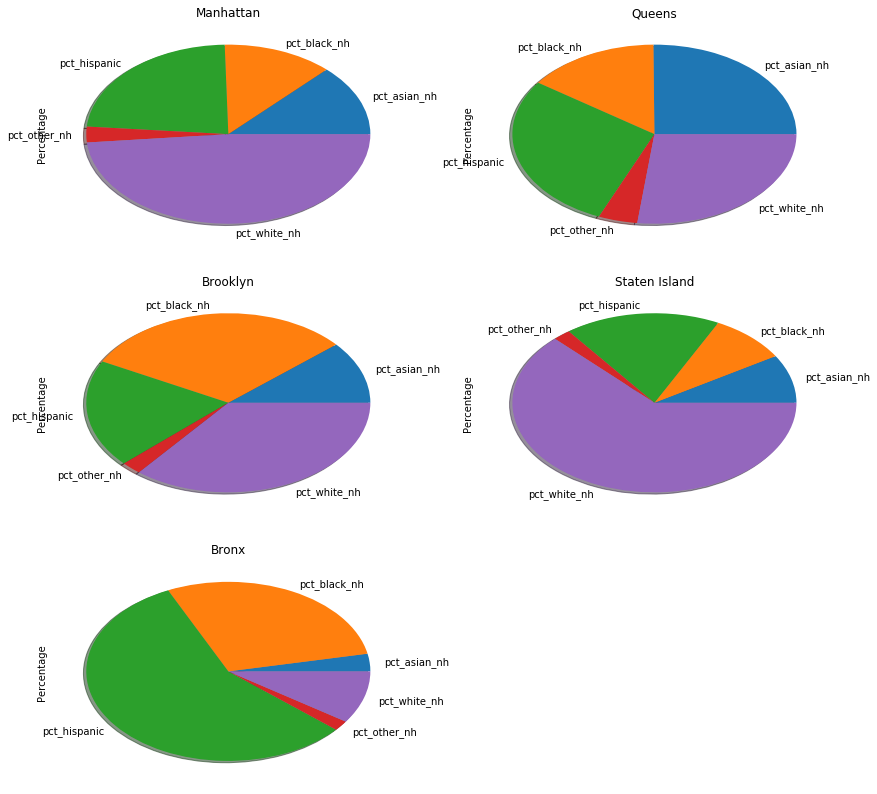

In [37]:
#Plot pie charts of Race across borough
fig, axes = plt.subplots(nrows=3, ncols=2)
fig.delaxes(axes[2,1])

race_df[race_df['Zone'] == 'Manhattan'].plot(ax=axes[0,0], kind='pie', labels=race_df['Race'], y='Percentage', figsize=[14, 14], title='Manhattan', legend=False, shadow=True)
race_df[race_df['Zone'] == 'Queens'].plot(ax=axes[0,1], kind='pie', labels=race_df['Race'], y='Percentage', figsize=[14, 14], title='Queens', legend=False, shadow=True)
race_df[race_df['Zone'] == 'Brooklyn'].plot(ax=axes[1,0], kind='pie', labels=race_df['Race'], y='Percentage', figsize=[14, 14], title='Brooklyn', legend=False, shadow=True)
race_df[race_df['Zone'] == 'Staten Island'].plot(ax=axes[1,1], kind='pie', labels=race_df['Race'], y='Percentage', figsize=[14, 14], title='Staten Island', legend=False, shadow=True)
race_df[race_df['Zone'] == 'Bronx'].plot(ax=axes[2,0], kind='pie', labels=race_df['Race'], y='Percentage', figsize=[14, 14], title='Bronx', legend=False, shadow=True)
plt.show()

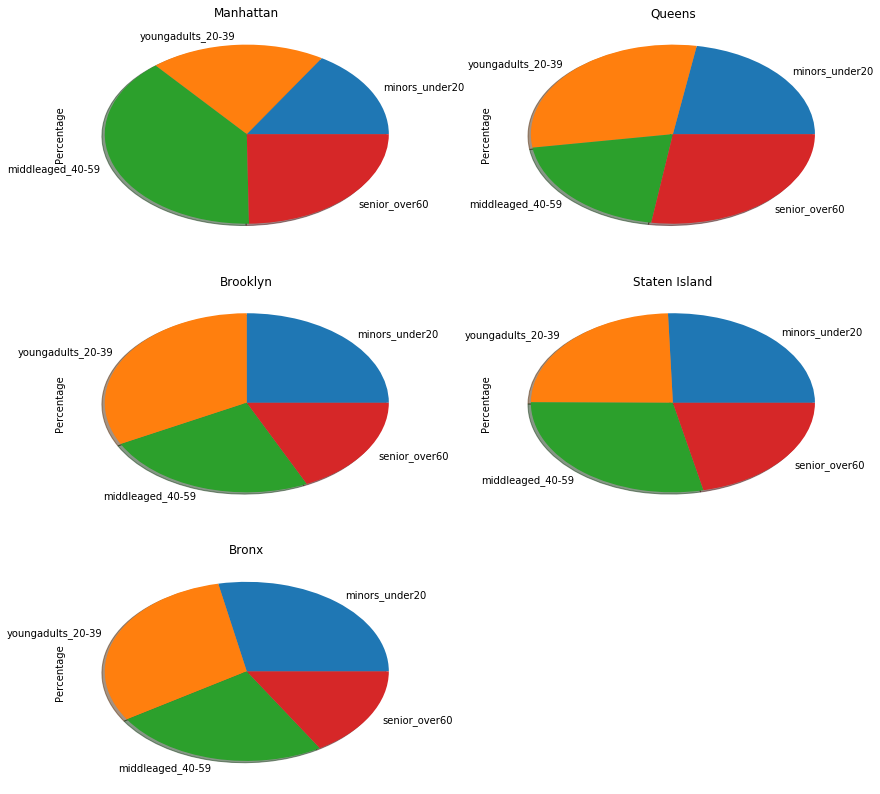

In [48]:
#Plot pie charts of Age Group across borough
fig, axes = plt.subplots(nrows=3, ncols=2)
fig.delaxes(axes[2,1])

age_df[age_df['Zone'] == 'Manhattan'].plot(ax=axes[0,0], kind='pie', labels=age_df['Age'], y='Percentage', figsize=[14, 14], title='Manhattan', legend=False, shadow=True)
age_df[age_df['Zone'] == 'Queens'].plot(ax=axes[0,1], kind='pie', labels=age_df['Age'], y='Percentage', figsize=[14, 14], title='Queens', legend=False, shadow=True)
age_df[age_df['Zone'] == 'Brooklyn'].plot(ax=axes[1,0], kind='pie', labels=age_df['Age'], y='Percentage', figsize=[14, 14], title='Brooklyn', legend=False, shadow=True)
age_df[age_df['Zone'] == 'Staten Island'].plot(ax=axes[1,1], kind='pie', labels=age_df['Age'], y='Percentage', figsize=[14, 14], title='Staten Island', legend=False, shadow=True)
age_df[age_df['Zone'] == 'Bronx'].plot(ax=axes[2,0], kind='pie', labels=age_df['Age'], y='Percentage', figsize=[14, 14], title='Bronx', legend=False, shadow=True)
plt.show()

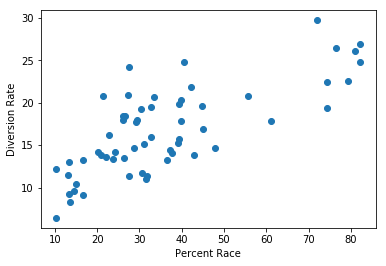

In [5]:
#EXAMPLE - Pyplot Scatter plot of variable against diversion rate against 2016 data
plt.scatter(df_2016['pct_bach_deg'], df_2016['Diversion Rate-Total (Total Recycling / Total Waste)'])
plt.xlabel('Percent Race')
plt.ylabel('Diversion Rate')
plt.rcParams['figure.figsize'] = [10, 8]
plt.show()

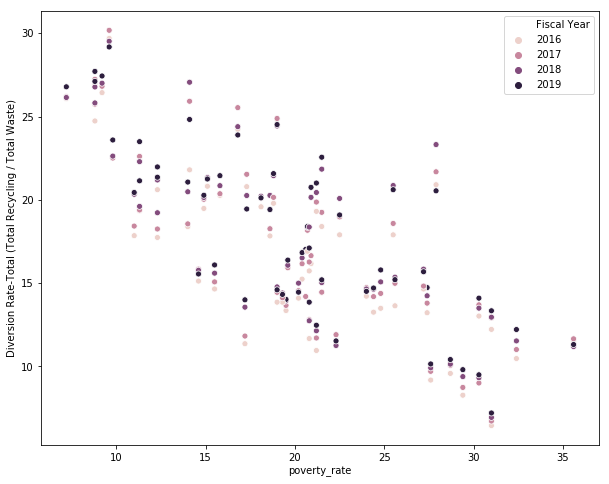

In [6]:
#EXAMPLE - Seaborn Scatter plot of variable against diversion rate against 4-year data
sns.scatterplot(data=df, x='poverty_rate', y='Diversion Rate-Total (Total Recycling / Total Waste)', hue='Fiscal Year', marker='o')
plt.rcParams['figure.figsize'] = [10, 8]
plt.show()

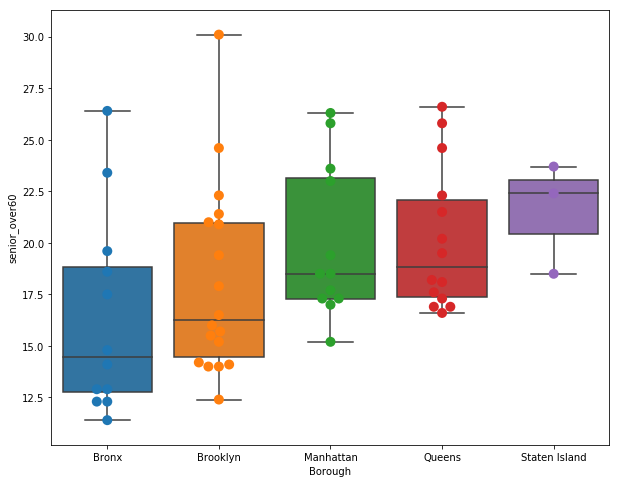

In [11]:
#DISCARD
#Visualize the X-variables in 2016 Across Boroughs
sns.boxplot(x='Zone', y='senior_over60', data=df_2016)
sns.swarmplot(data=df_2016, x='Zone', y='senior_over60', size=10)
plt.xlabel('Borough')
plt.rcParams['figure.figsize'] = [10, 8]

plt.show()

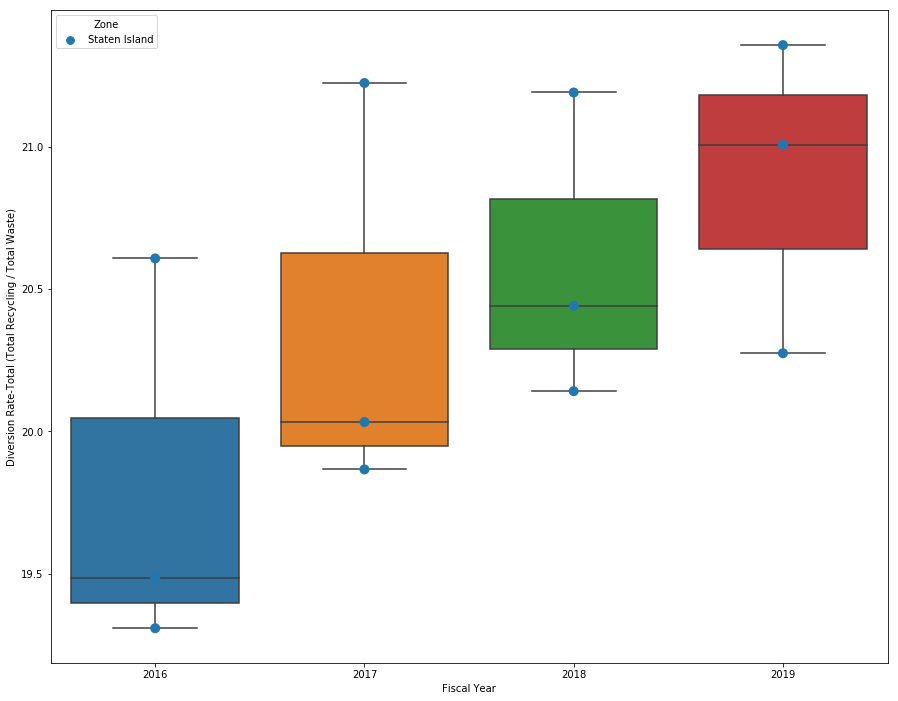

In [42]:
#DISCARD
#Visualize the Diversion Rates over time from 2016-2019 by ZONE
sns.boxplot(x='Fiscal Year', y='Diversion Rate-Total (Total Recycling / Total Waste)', data=df[df.Zone == 'Staten Island'])
sns.swarmplot(data=df[df.Zone == 'Staten Island'], x='Fiscal Year', y='Diversion Rate-Total (Total Recycling / Total Waste)', size=10, hue='Zone')
plt.rcParams['figure.figsize'] = [15, 12]
plt.show()

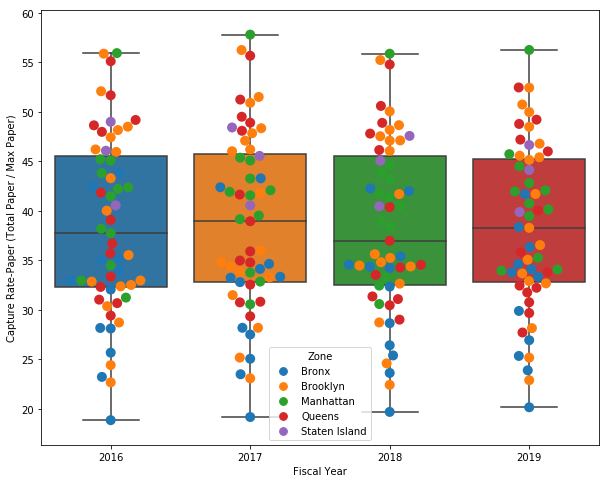

In [14]:
#Visualize the Capture Rates Paper over time from 2016-2019
sns.boxplot(x='Fiscal Year', y='Capture Rate-Paper (Total Paper / Max Paper)', data=df)
sns.swarmplot(data=df, x='Fiscal Year', y='Capture Rate-Paper (Total Paper / Max Paper)', size=10, hue='Zone')
plt.rcParams['figure.figsize'] = [10, 8]
plt.show()

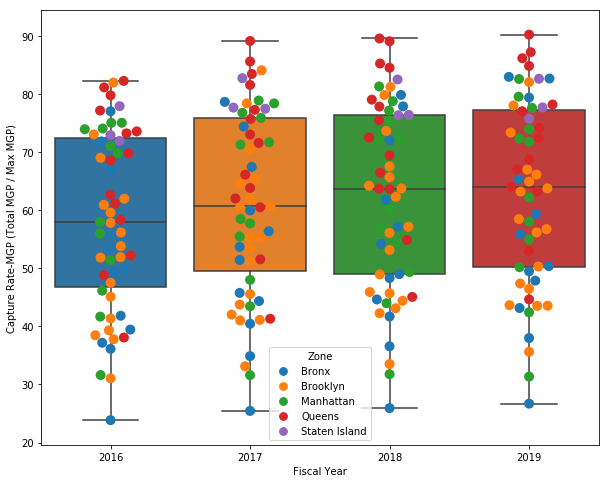

In [15]:
#Visualize the Capture Rates MGP over time from 2016-2019
sns.boxplot(x='Fiscal Year', y='Capture Rate-MGP (Total MGP / Max MGP)', data=df)
sns.swarmplot(data=df, x='Fiscal Year', y='Capture Rate-MGP (Total MGP / Max MGP)', size=10, hue='Zone')
plt.rcParams['figure.figsize'] = [10, 8]
plt.show()

In [44]:
#Create list of all possible X-variables in dataframe, which are the columns that are NOT the rates
#Create list of all possible Y-variables in dataframe, which are the columns that ARE the rates
rec_x_variables = list(df.columns[9:])
rec_y_rates = list(df.columns[4:8])

In [45]:
rec_x_variables

['area_sqmi',
 'pop_2010',
 'poverty_rate',
 'pct_bach_deg',
 'unemployment_cd',
 'mean_commute',
 'pct_hh_rent_burd',
 'pct_clean_strts',
 'crime_per_1000',
 'count_parks',
 'count_hosp_clinic',
 'count_libraries',
 'count_public_schools',
 'pct_foreign_born',
 'lep_rate',
 'under18_rate',
 'male_under_5',
 'female_under_5',
 'male_5_9',
 'female_5_9',
 'male_10_14',
 'female_10_14',
 'male_15_19',
 'female_15_19',
 'male_20_24',
 'female_20_24',
 'male_25_29',
 'female_25_29',
 'male_30_34',
 'female_30_34',
 'male_35_39',
 'female_35_39',
 'male_40_44',
 'female_40_44',
 'male_45_49',
 'female_45_49',
 'male_50_54',
 'female_50_54',
 'male_55_59',
 'female_55_59',
 'male_60_64',
 'female_60_64',
 'male_65_69',
 'female_65_69',
 'male_70_74',
 'female_70_74',
 'male_75_79',
 'female_75_79',
 'male_80_84',
 'female_80_84',
 'male_85_over',
 'female_85_over',
 'pct_white_nh',
 'pct_black_nh',
 'pct_asian_nh',
 'pct_other_nh',
 'pct_hispanic',
 'fp_100_pop',
 'female_total',
 'male_tota

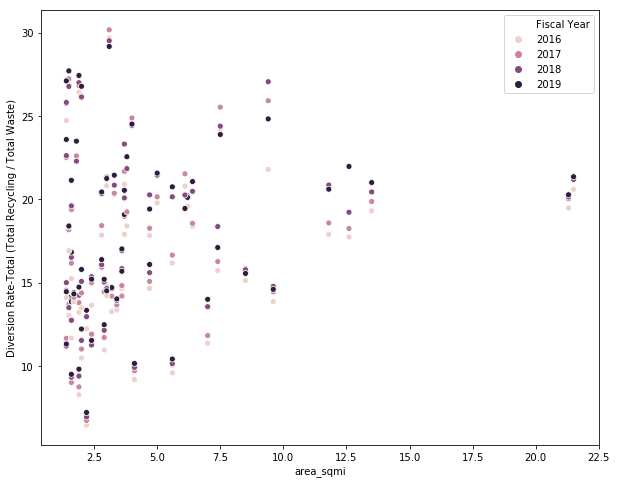

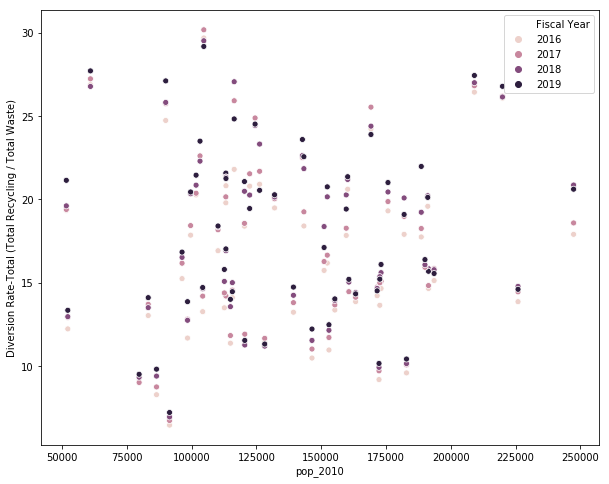

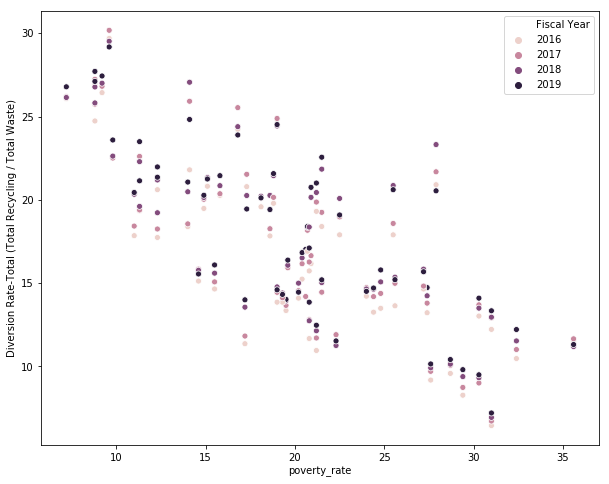

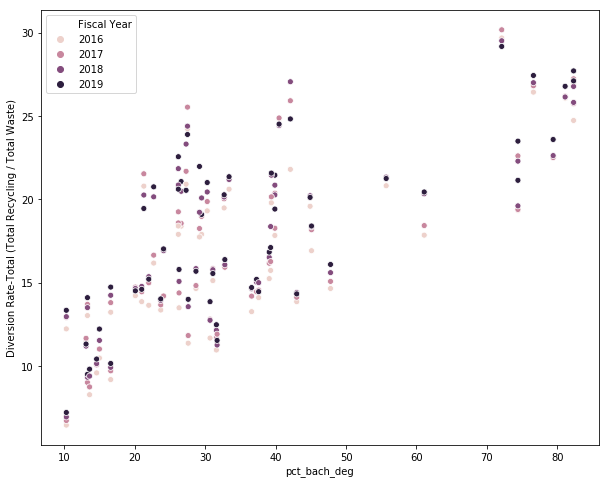

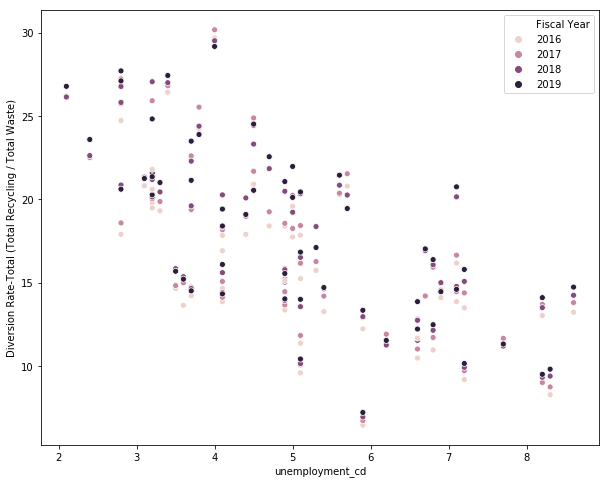

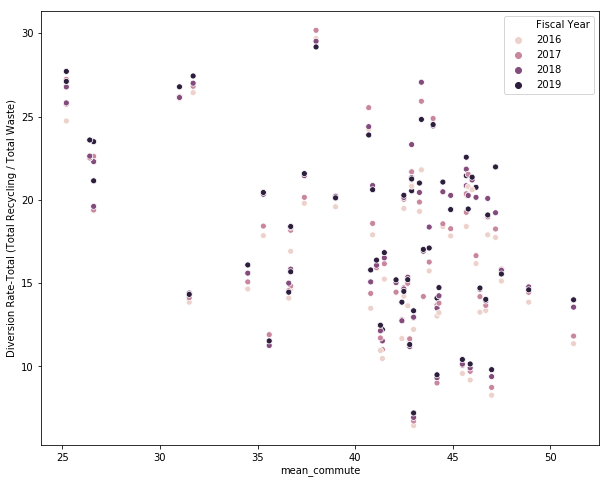

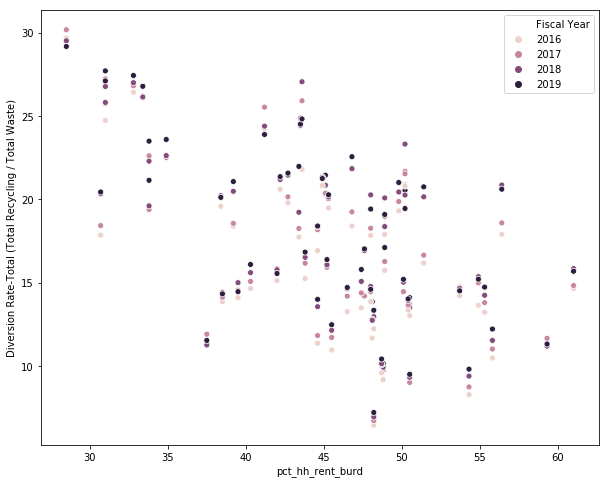

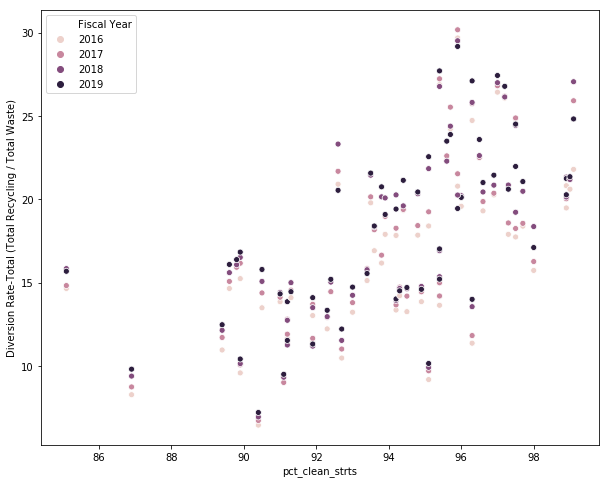

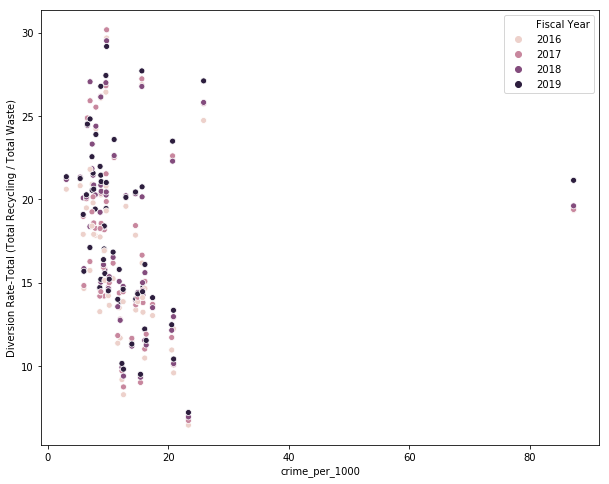

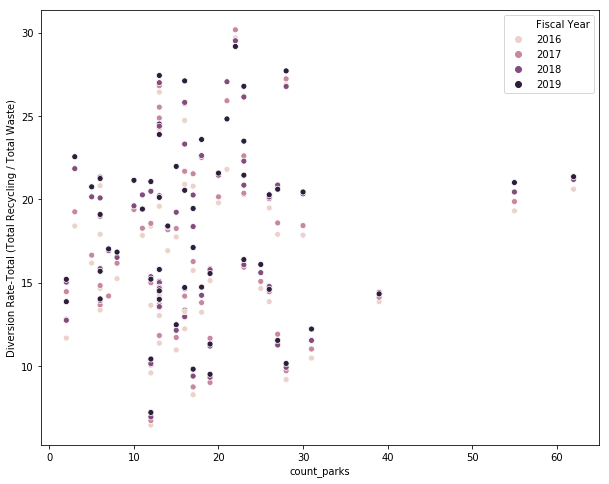

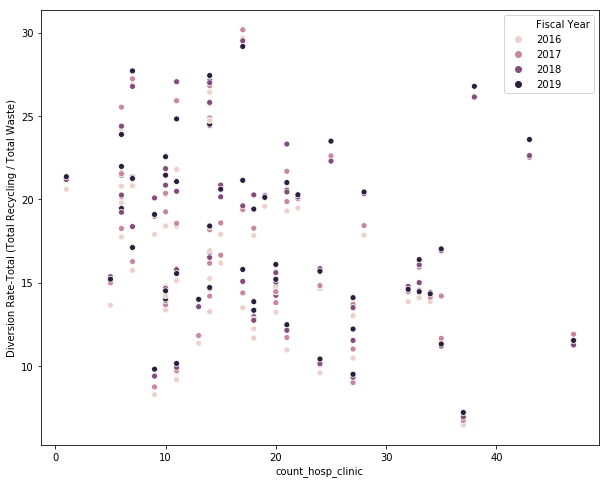

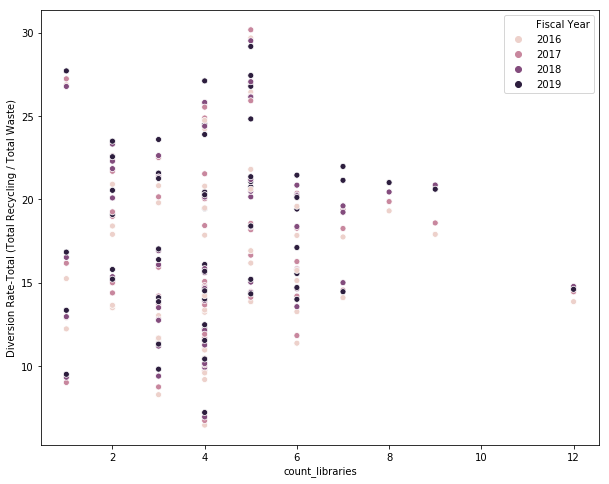

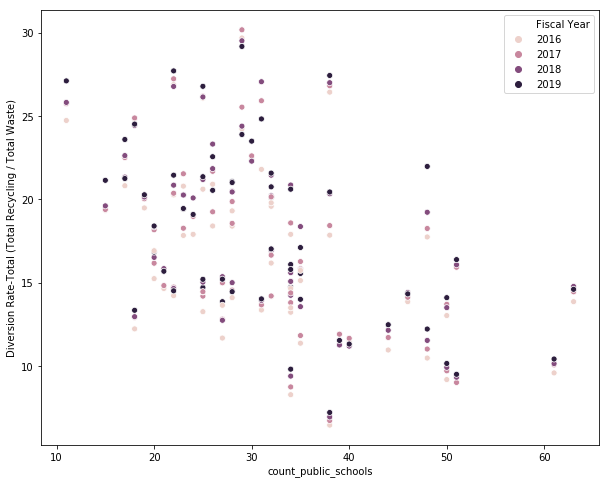

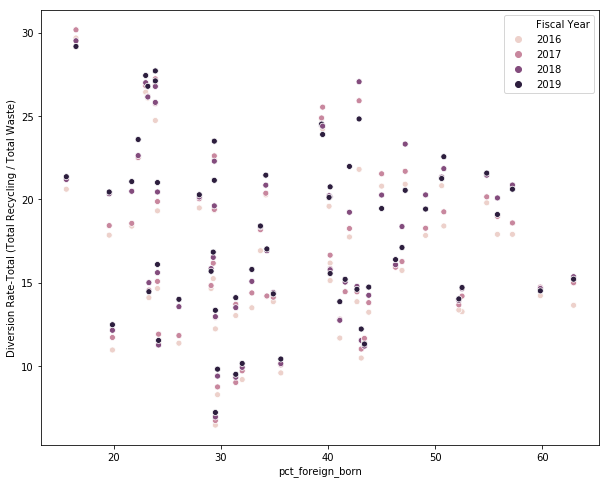

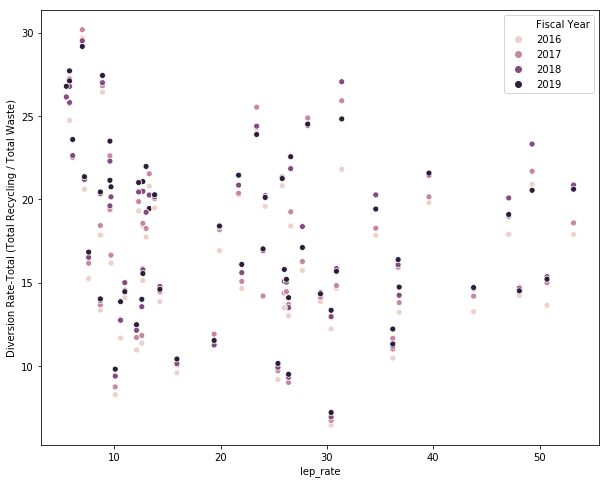

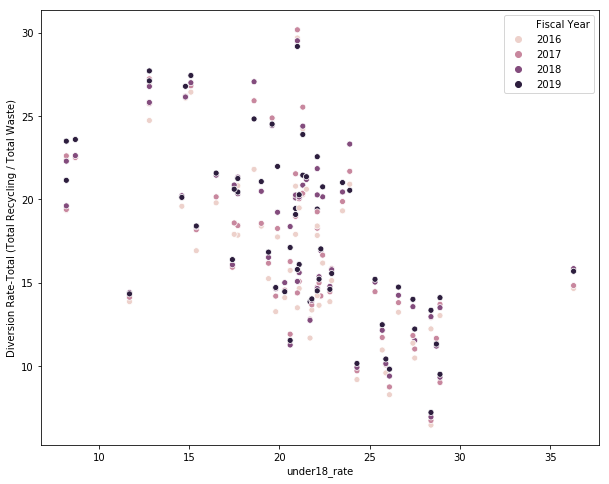

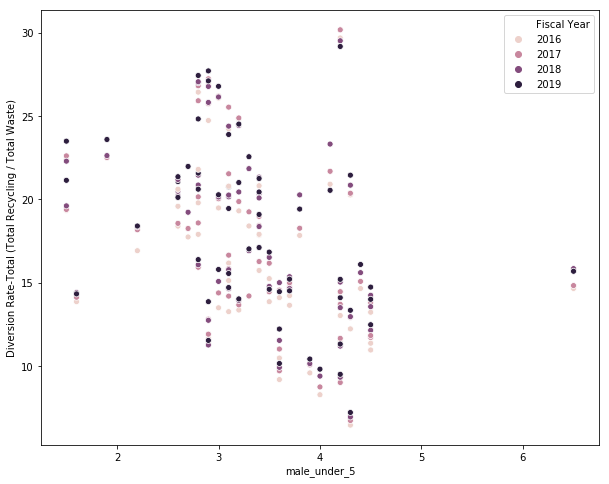

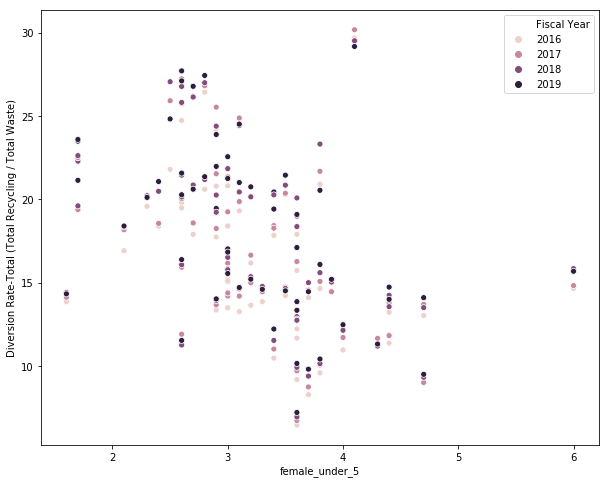

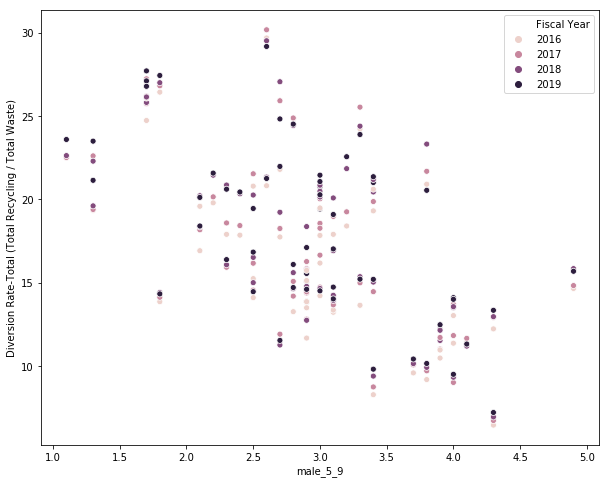

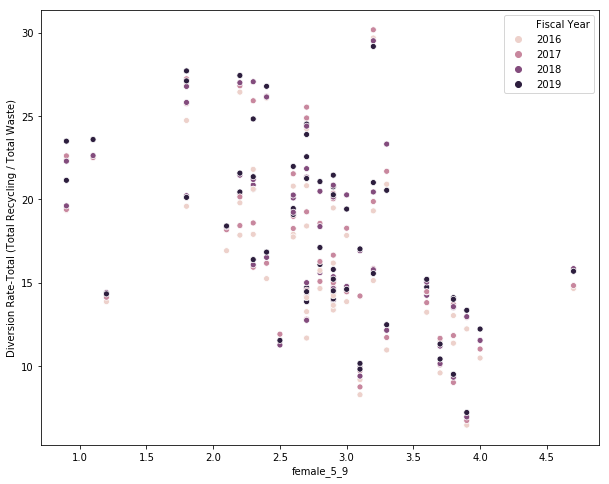

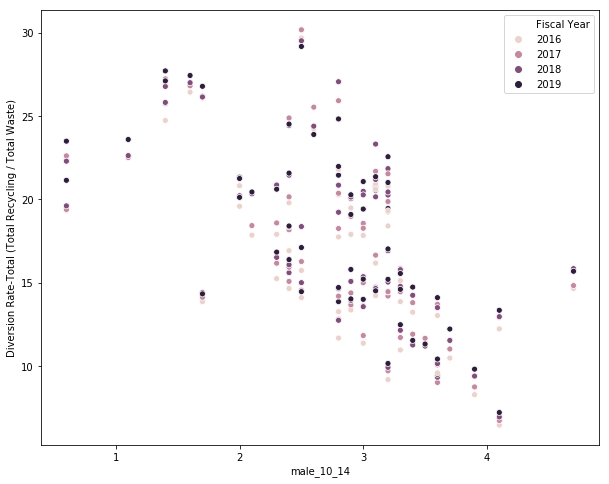

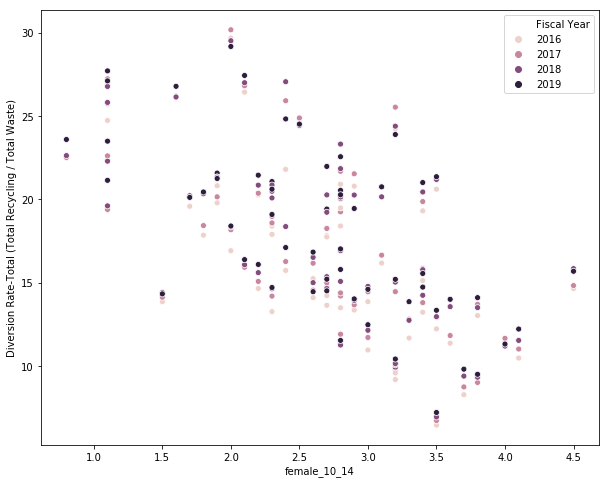

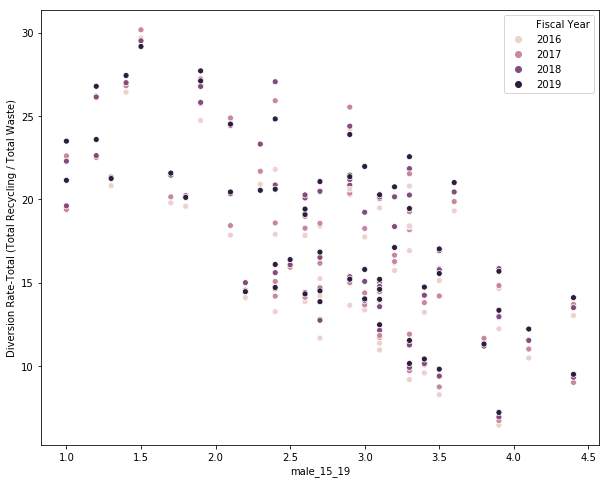

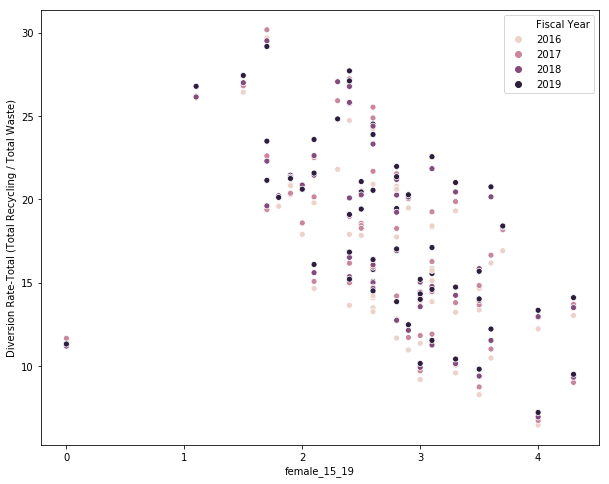

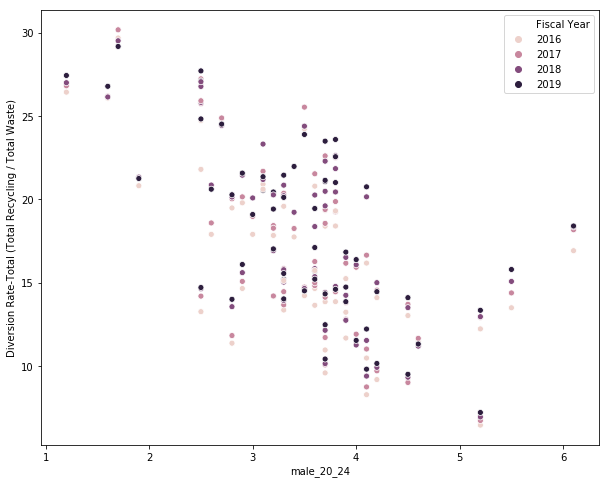

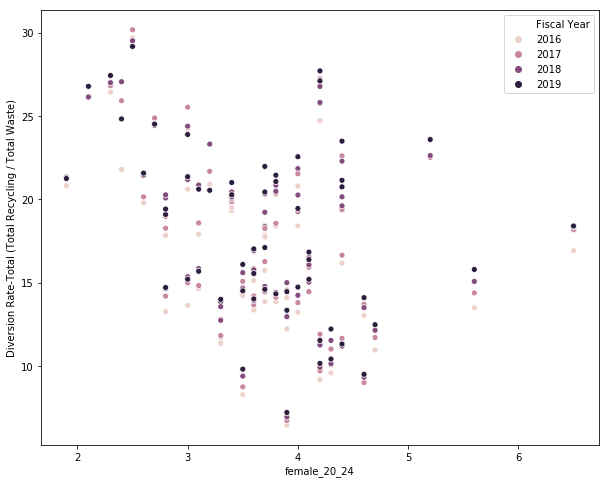

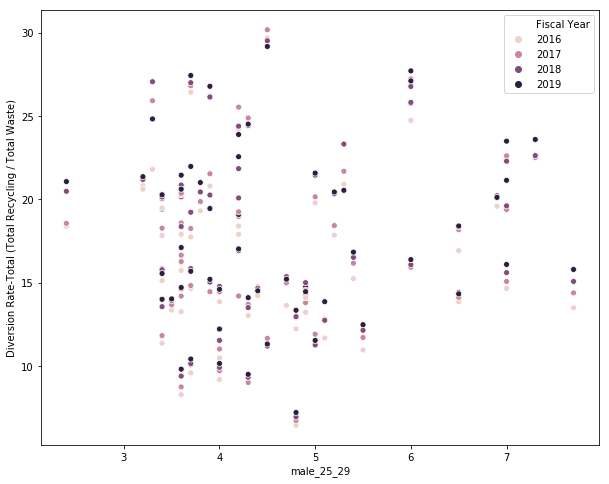

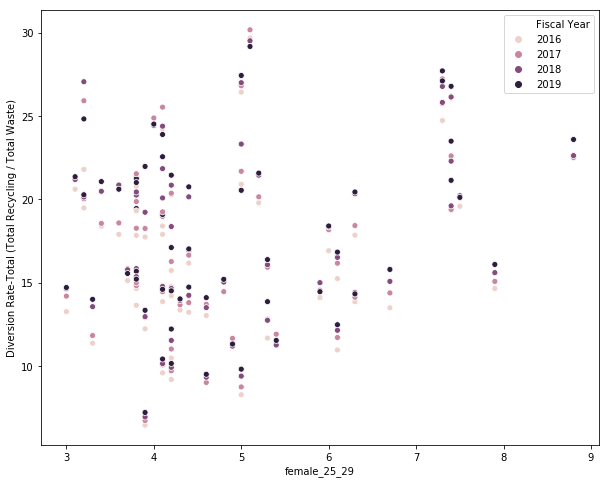

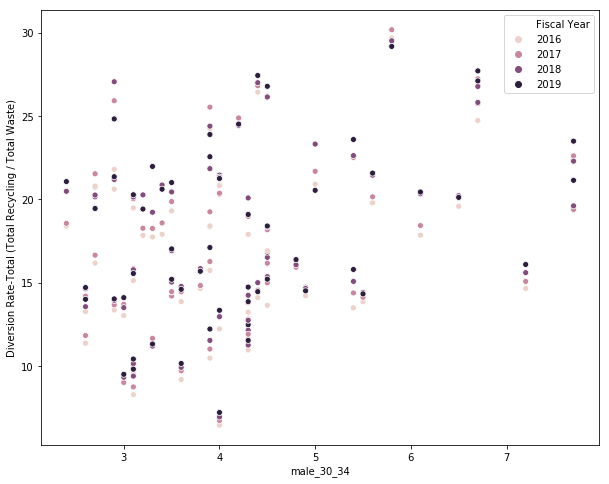

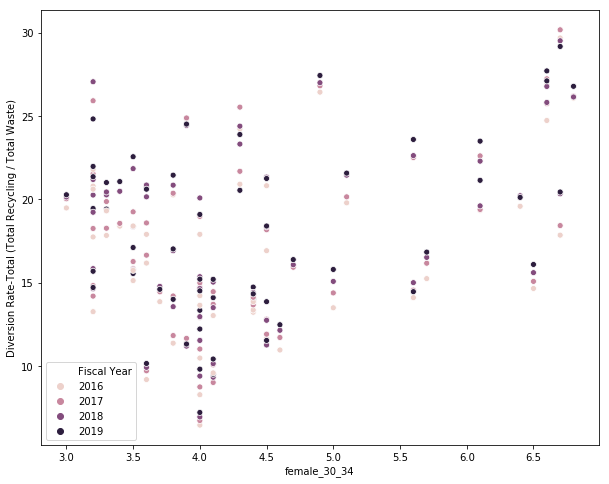

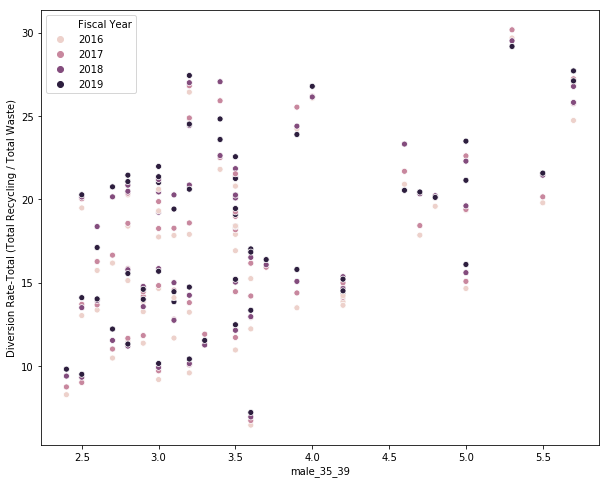

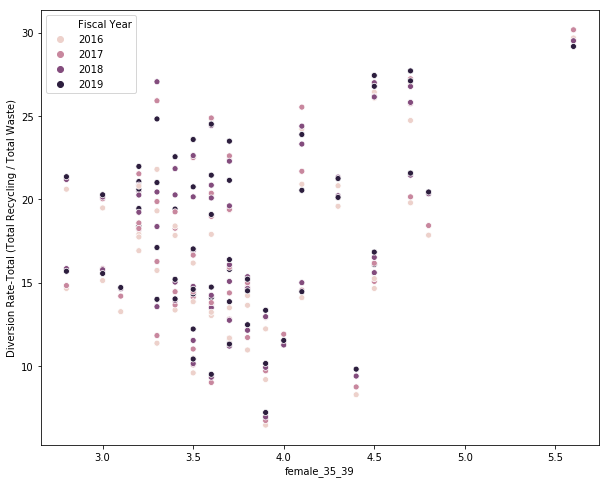

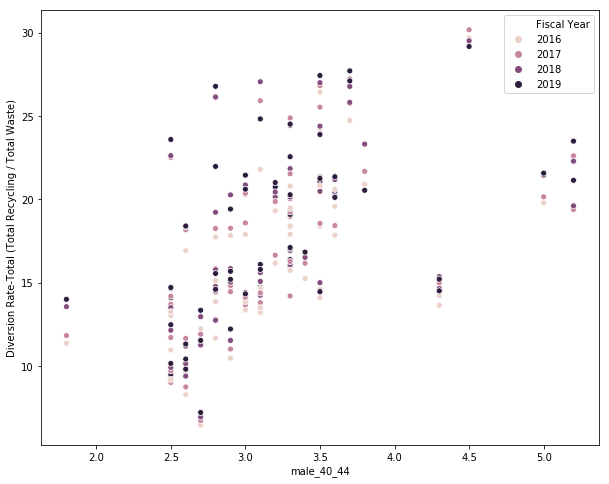

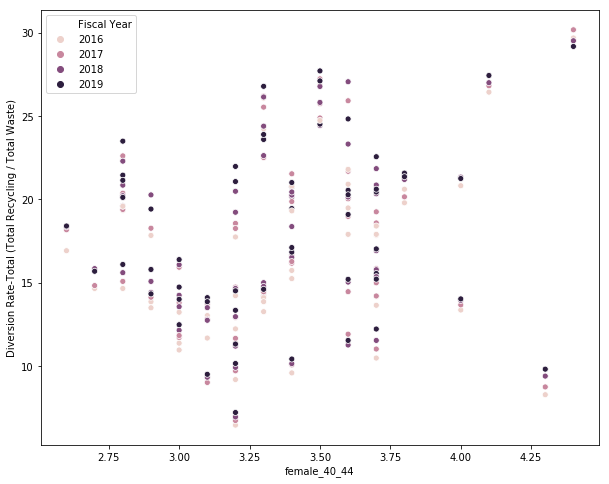

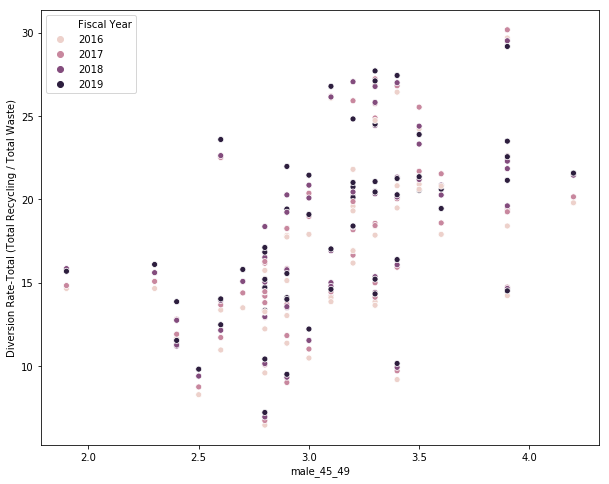

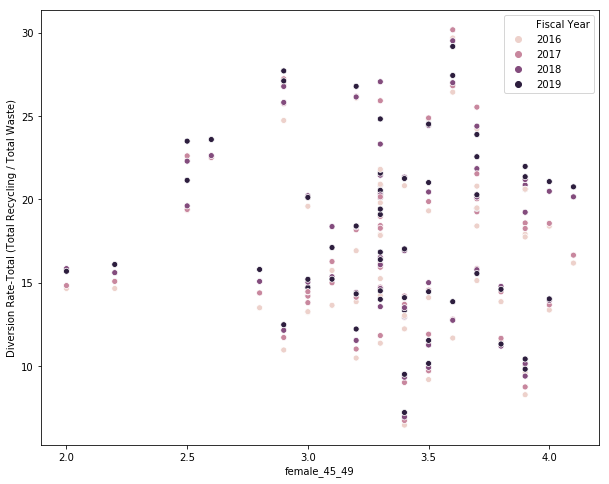

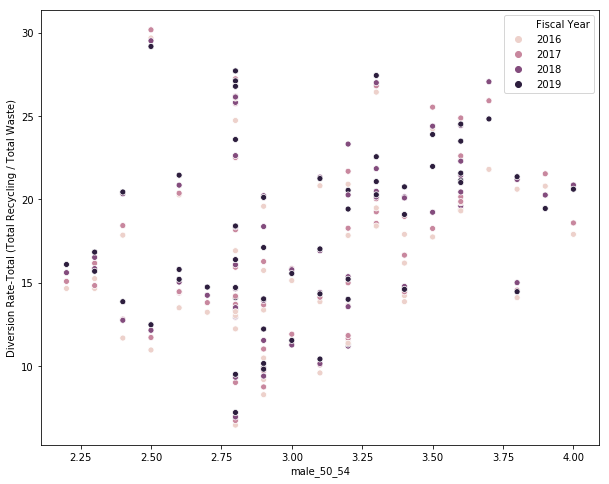

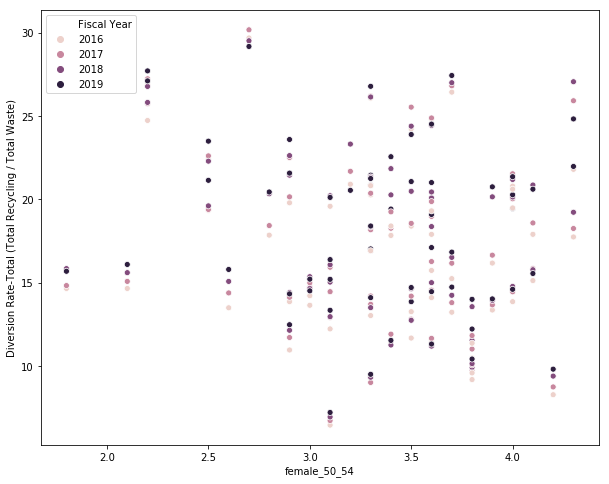

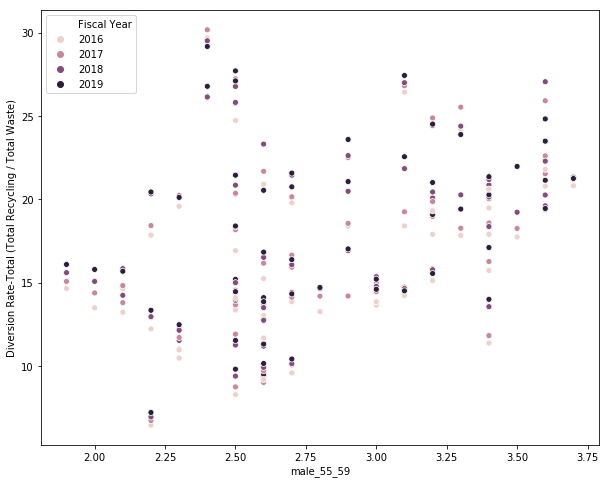

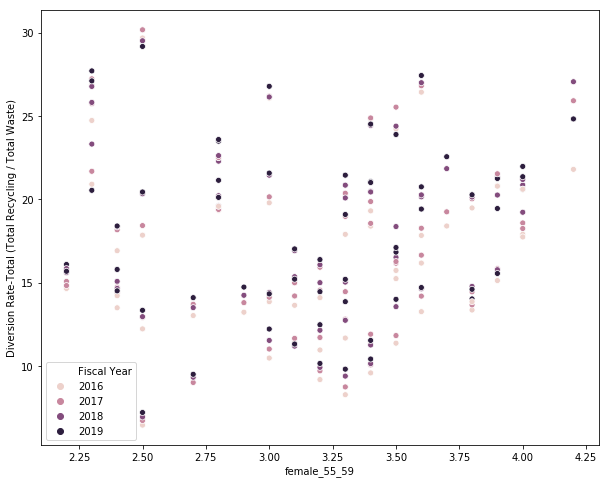

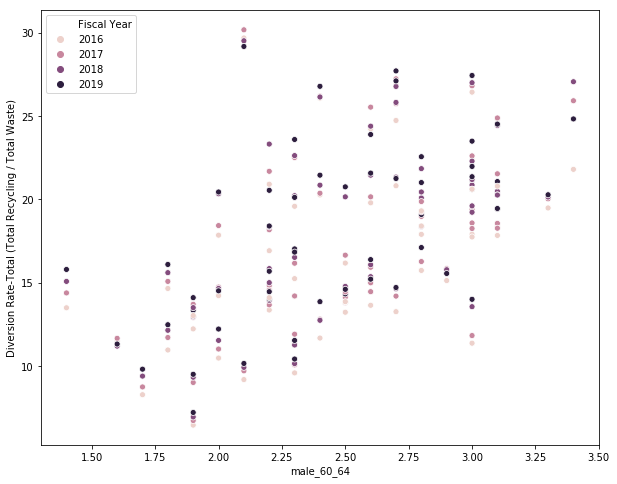

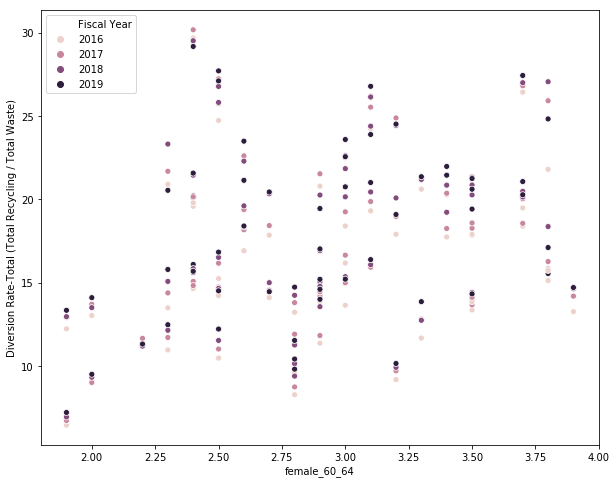

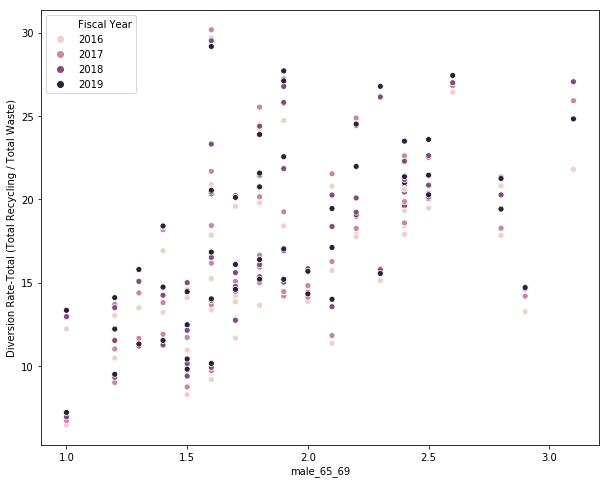

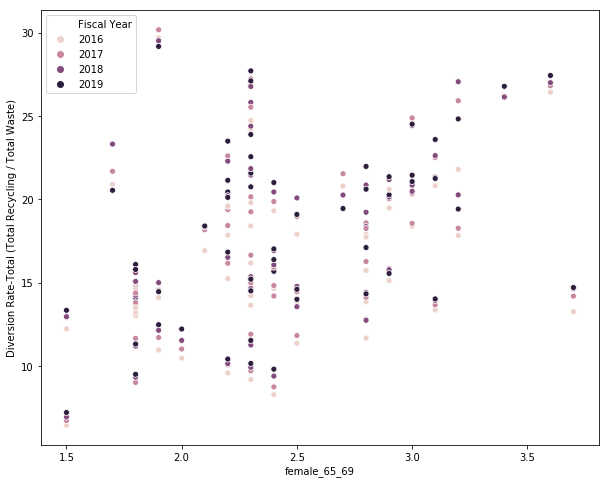

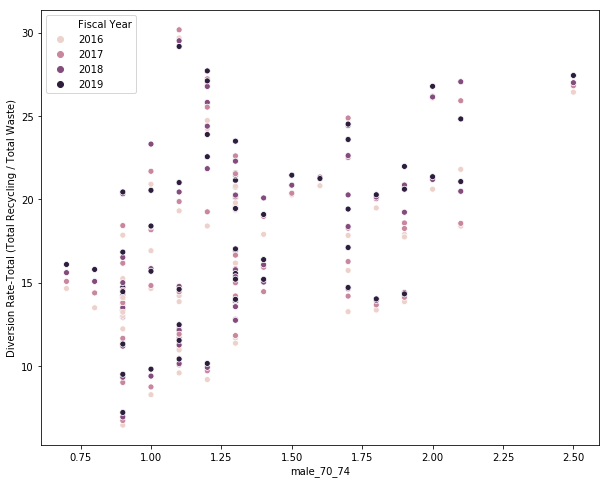

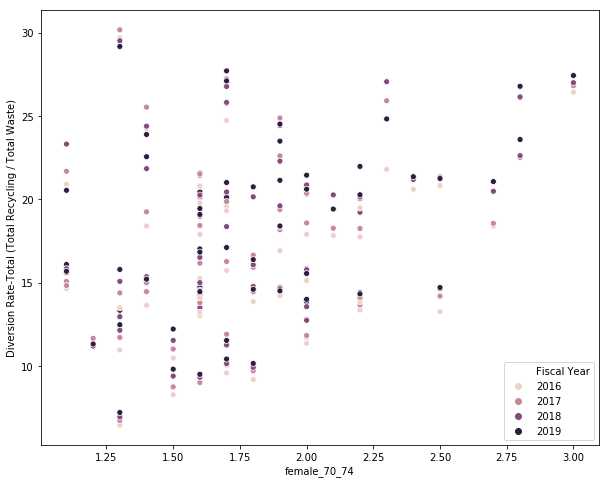

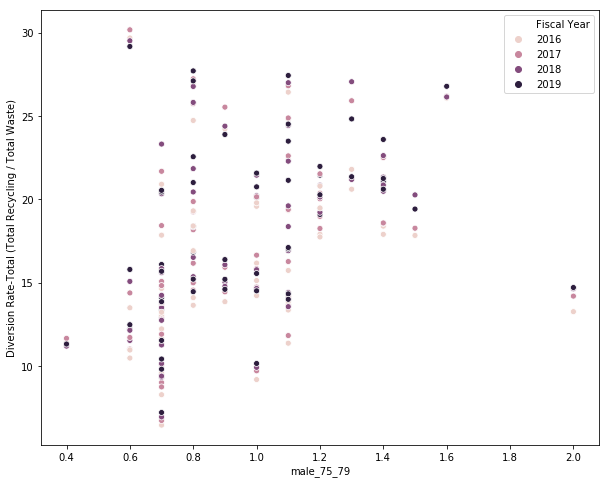

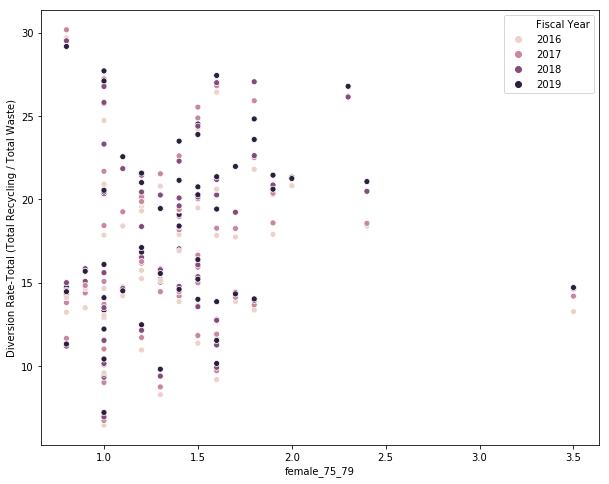

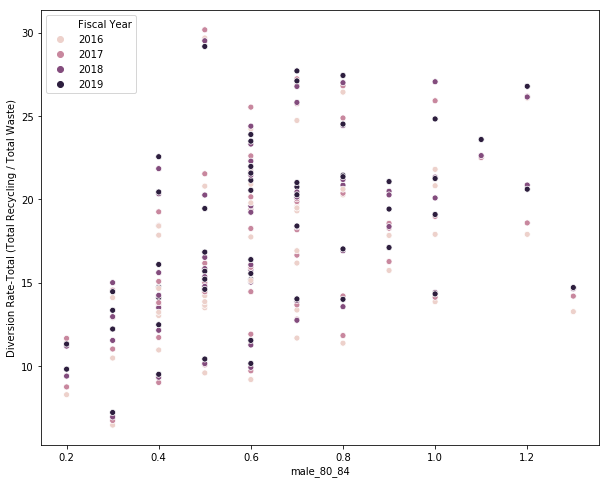

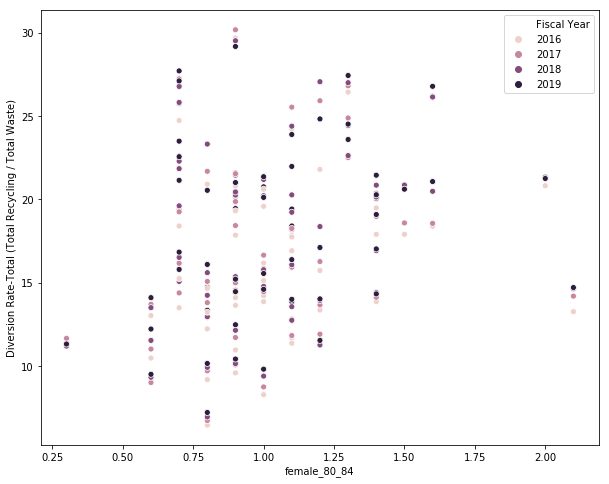

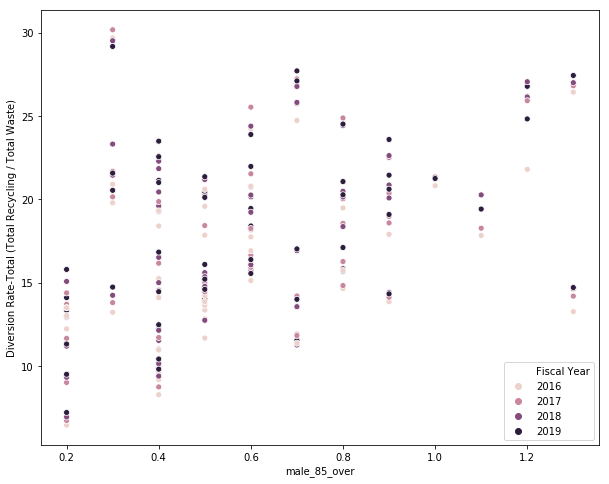

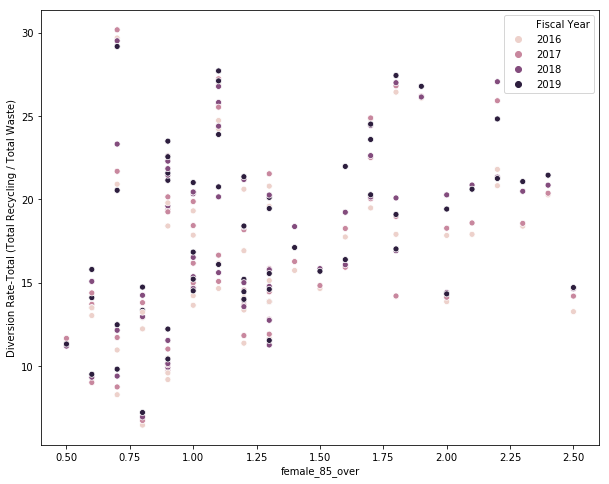

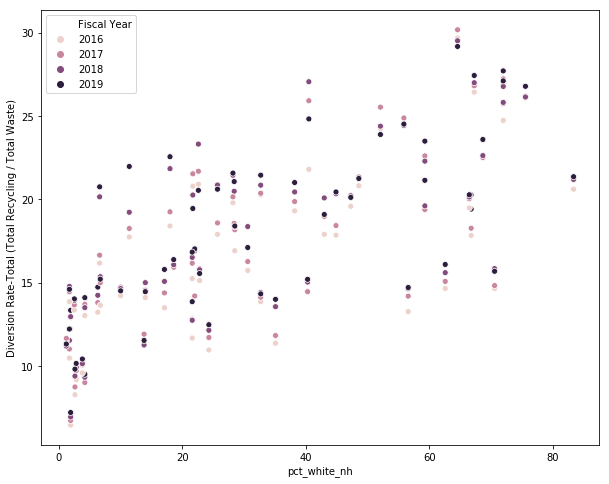

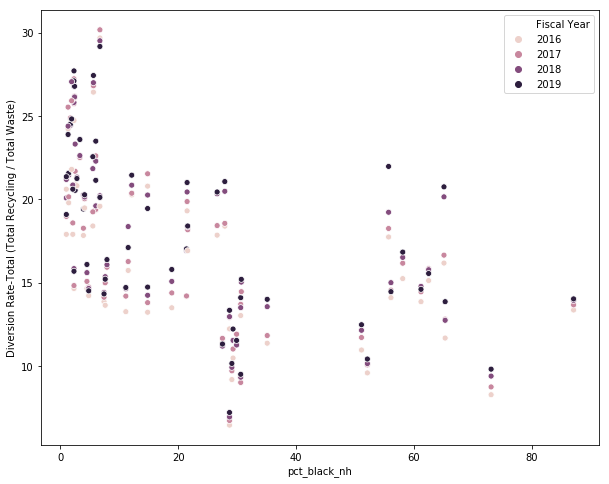

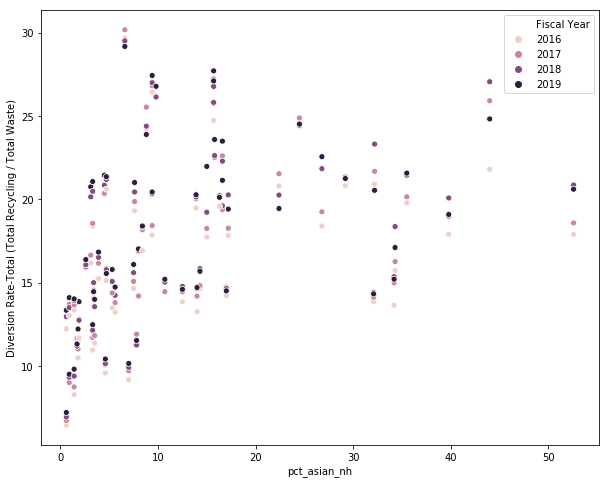

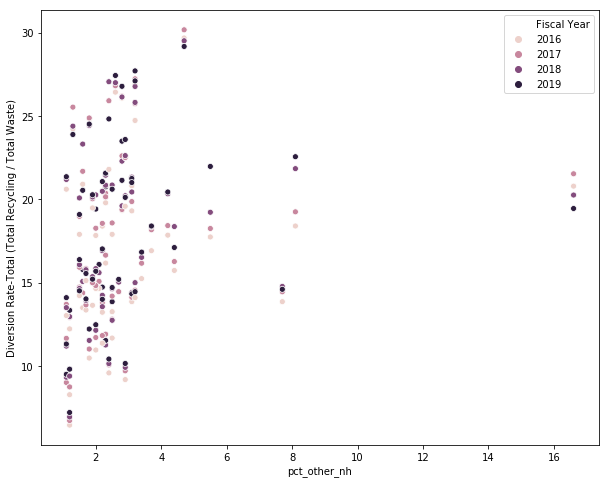

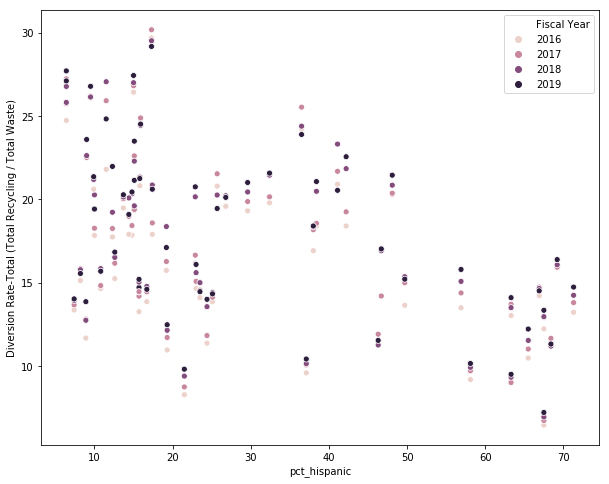

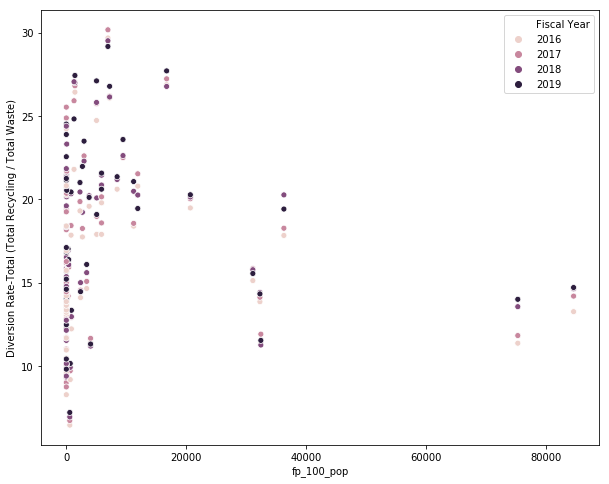

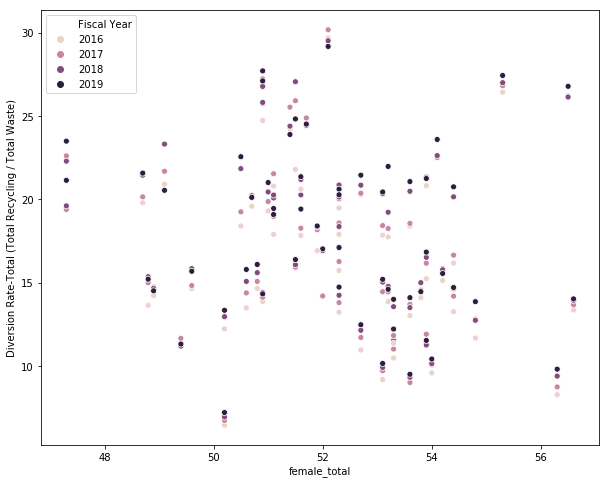

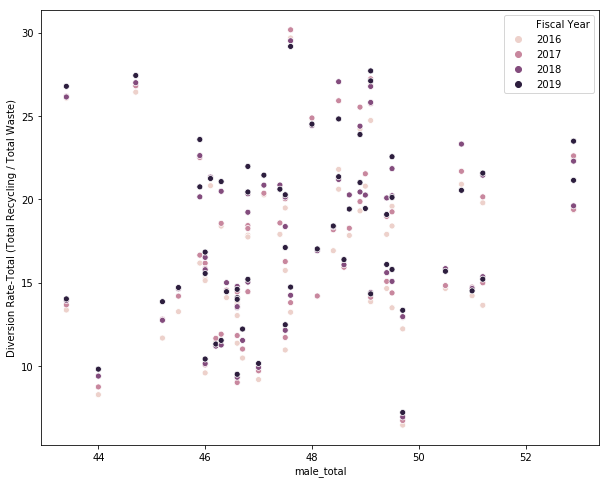

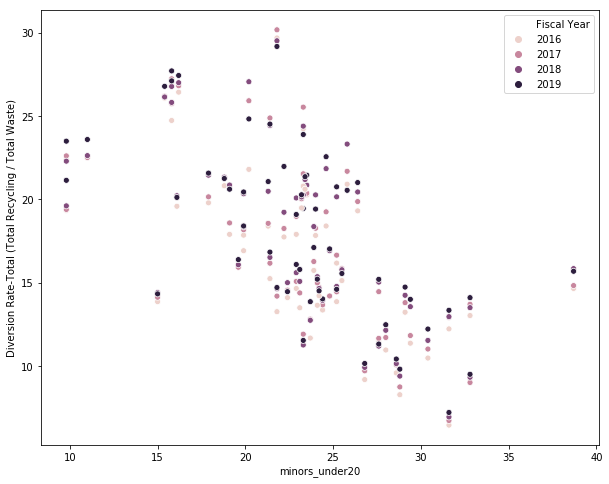

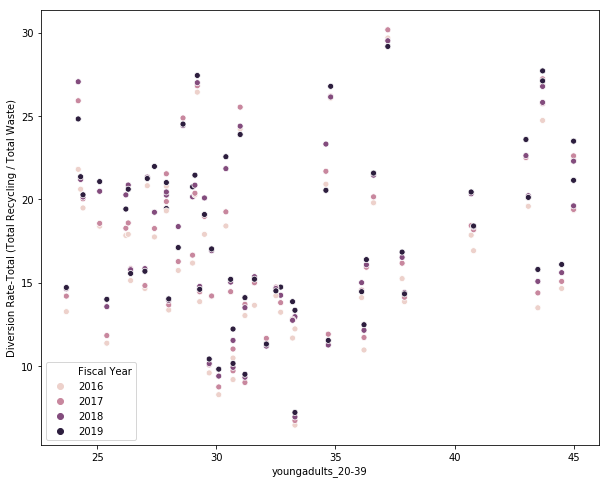

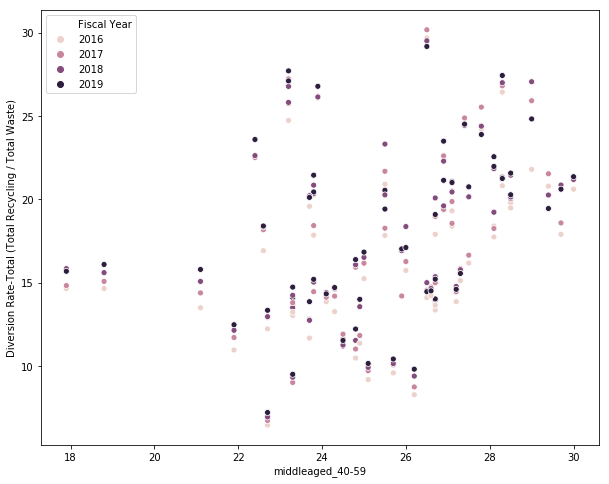

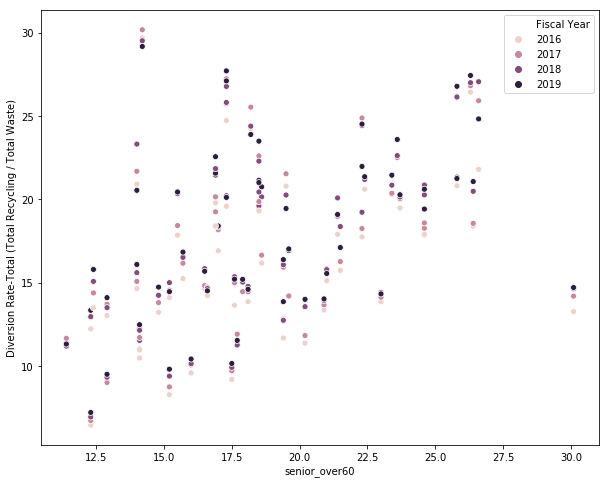

In [19]:
#Seaborn Scatter Plots of all variables against Diversion Rates by Borough
for i in rec_x_variables:
    sns.scatterplot(data=df, x=i, y='Diversion Rate-Total (Total Recycling / Total Waste)', hue='Fiscal Year', marker='o')
    plt.show()

/Users/varunraja/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


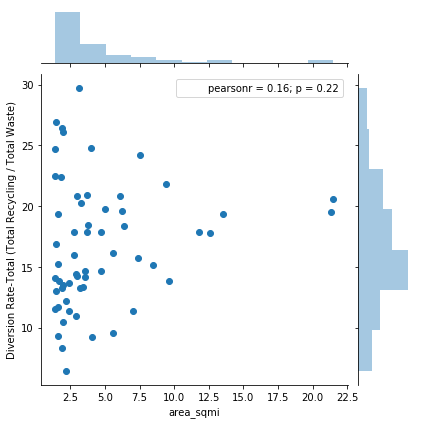

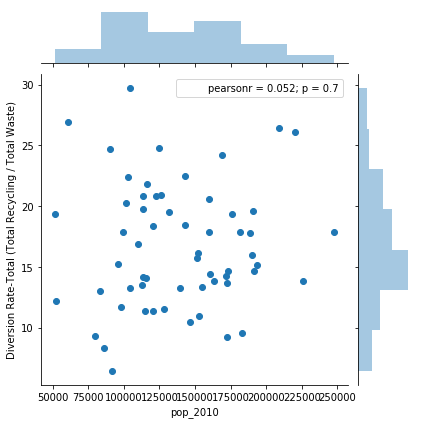

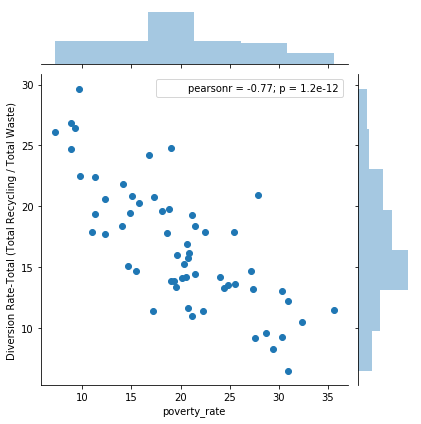

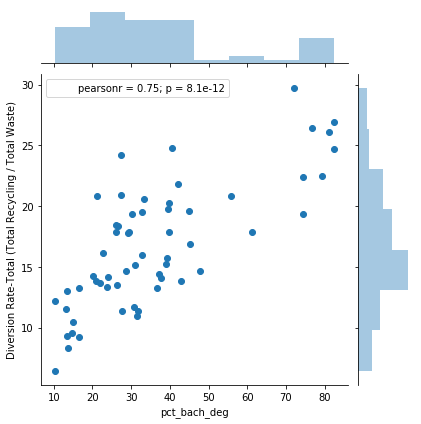

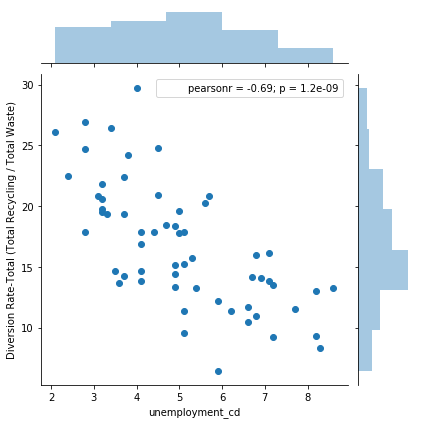

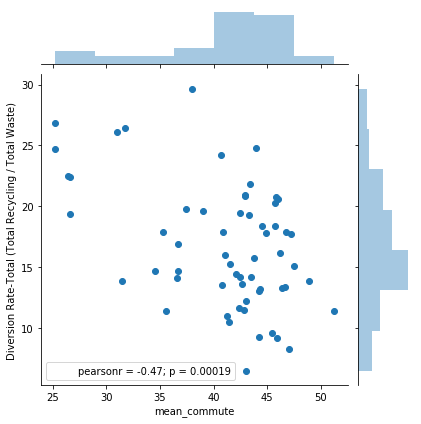

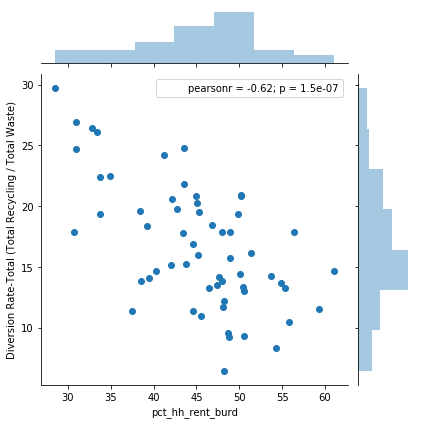

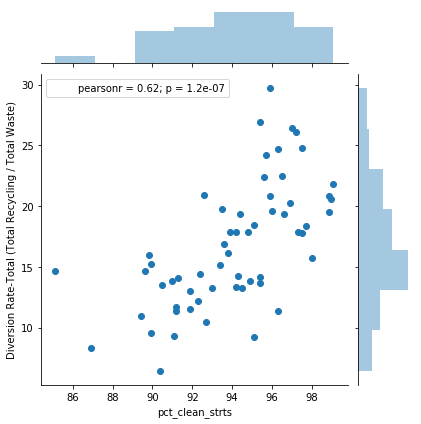

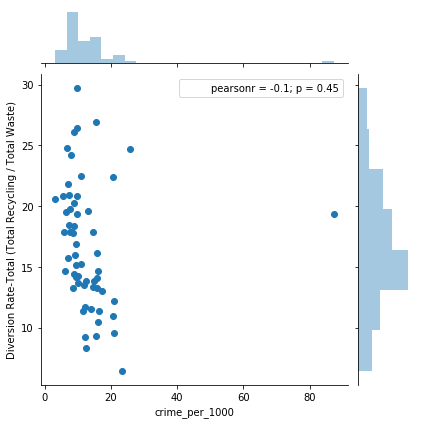

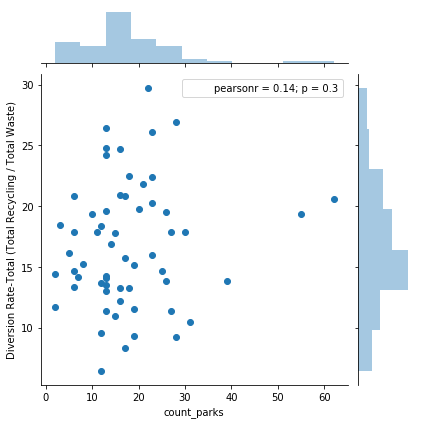

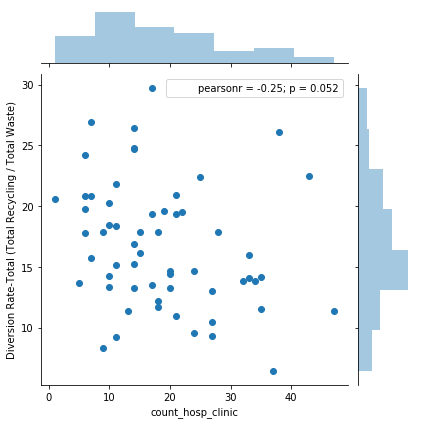

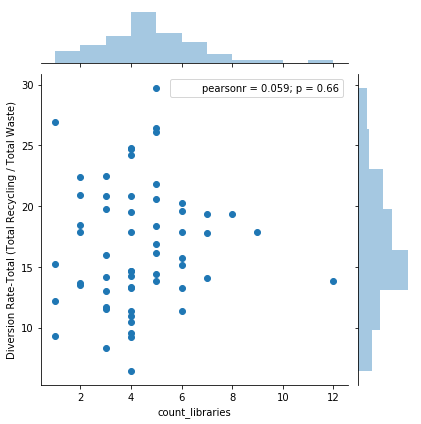

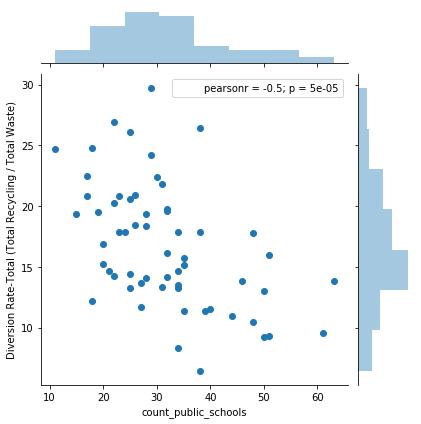

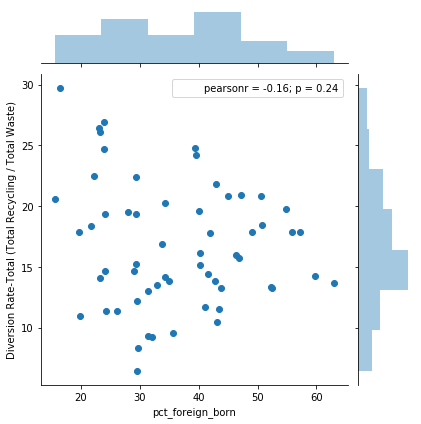

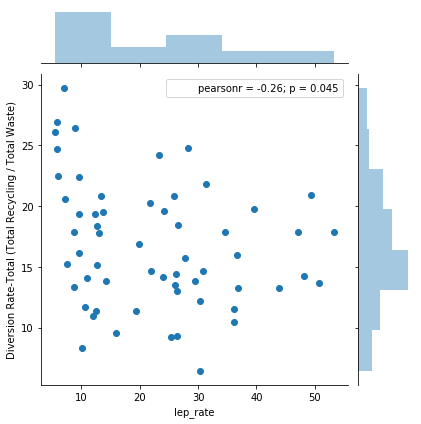

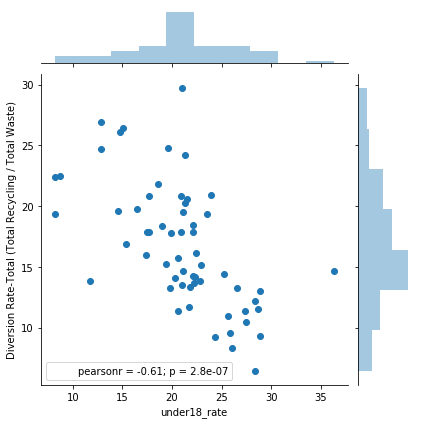

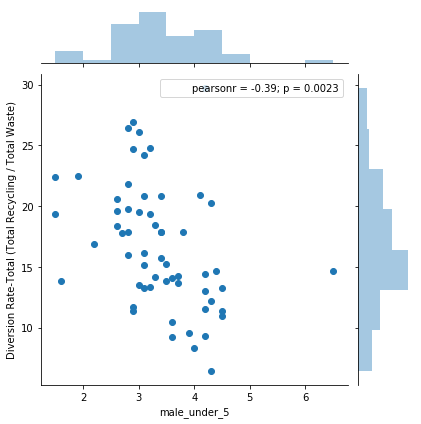

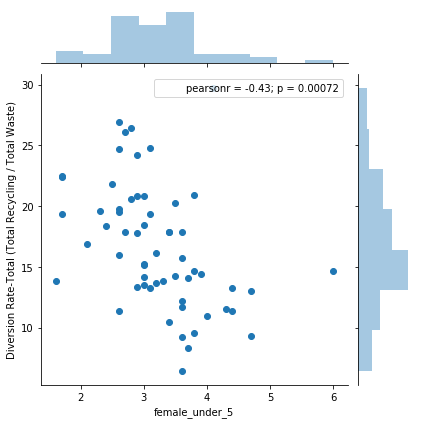

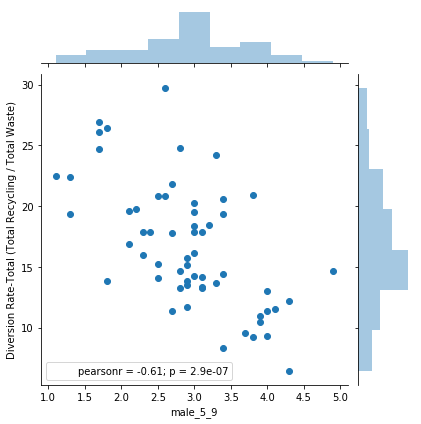

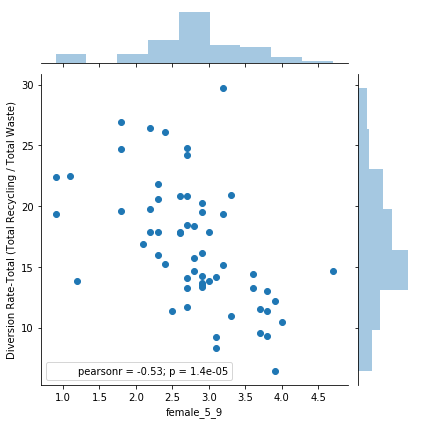

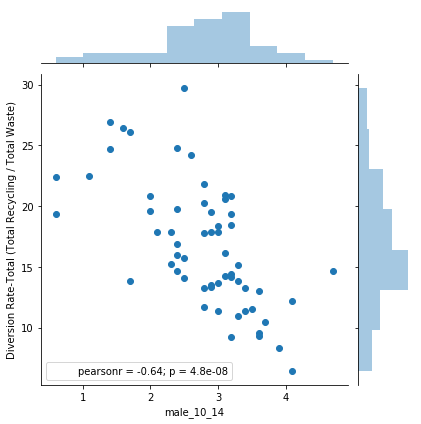

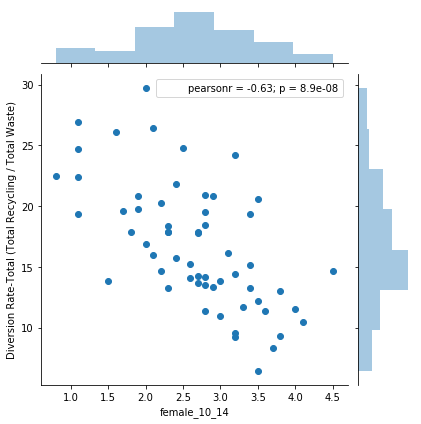

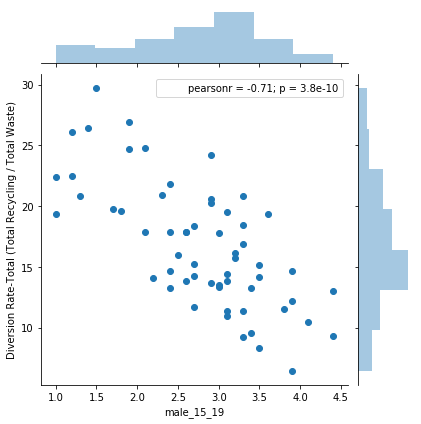

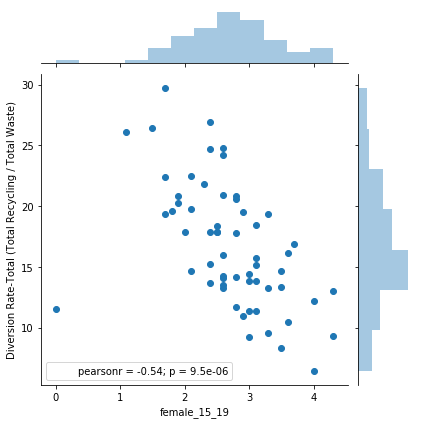

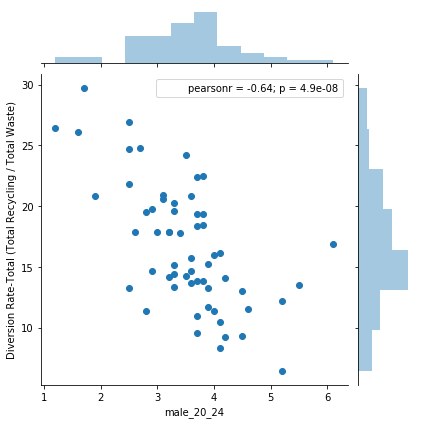

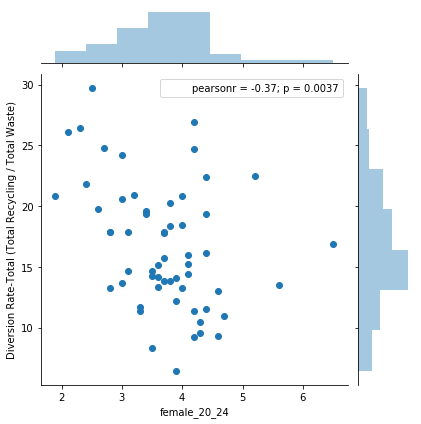

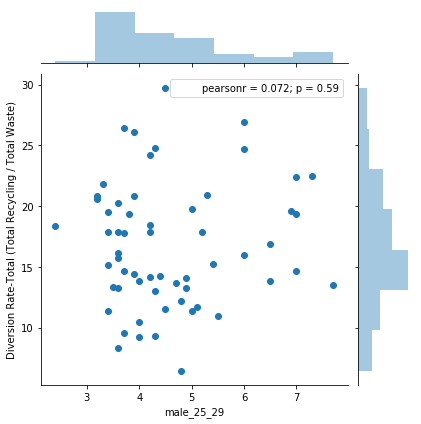

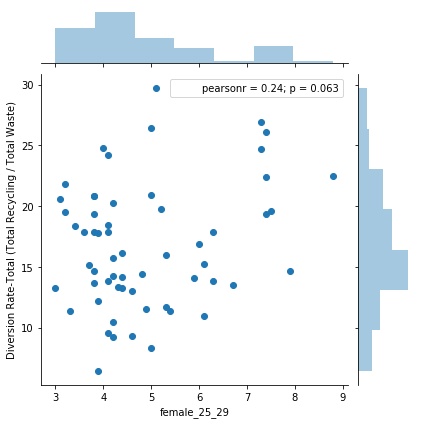

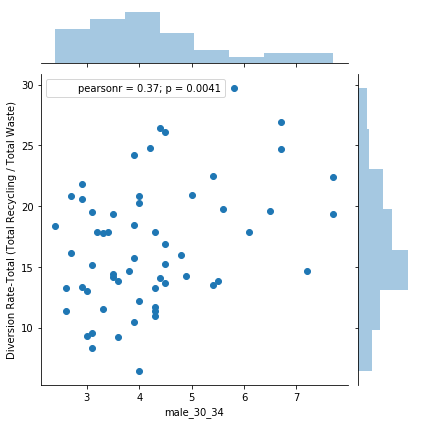

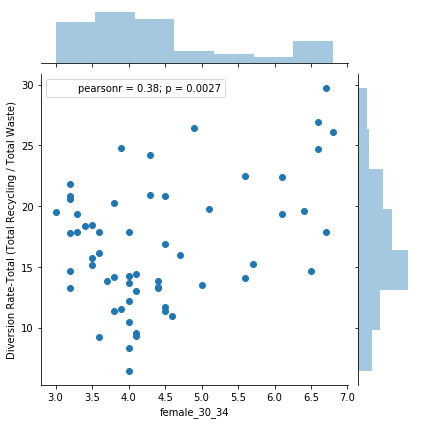

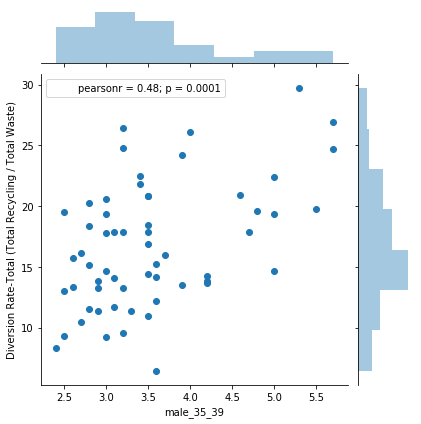

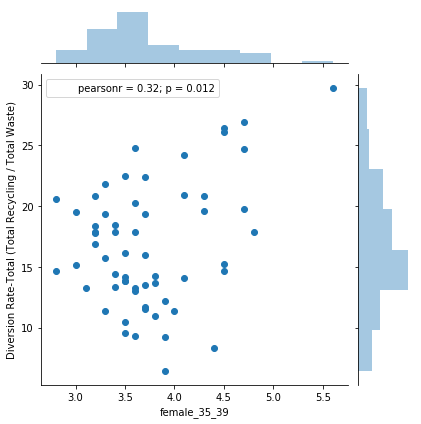

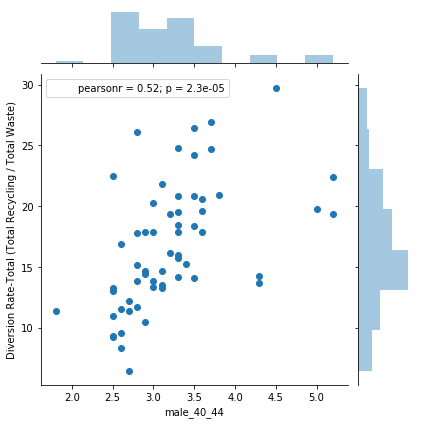

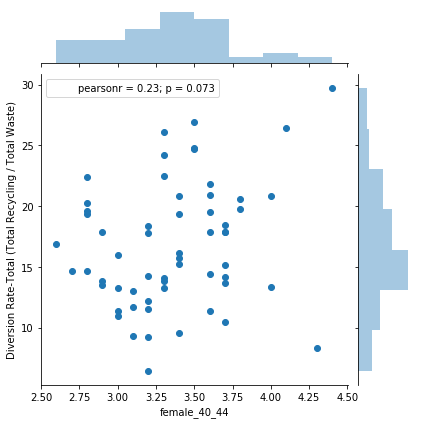

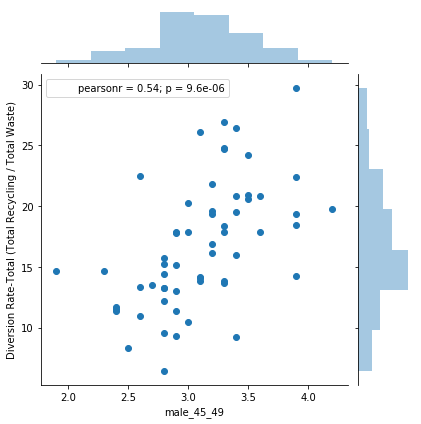

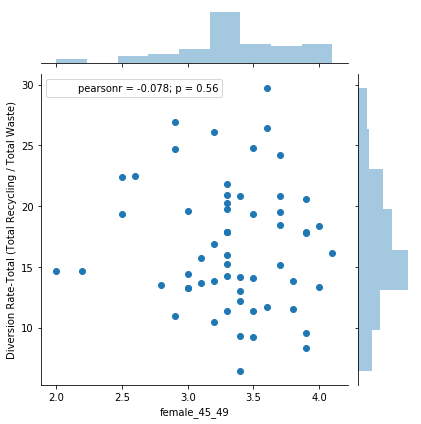

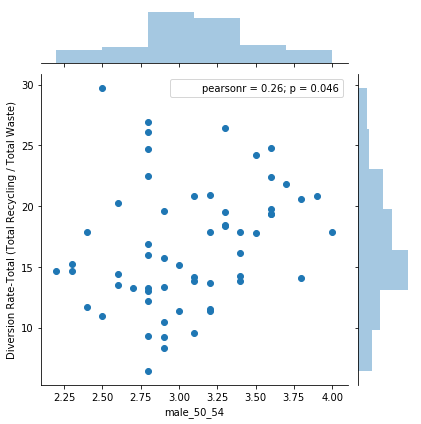

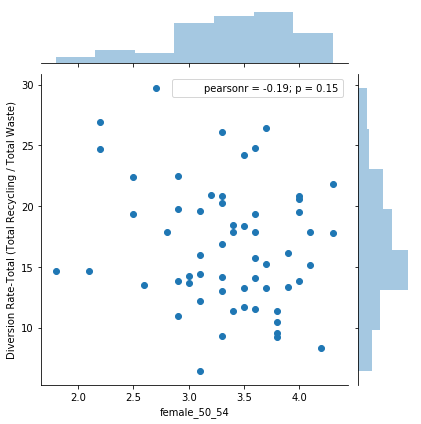

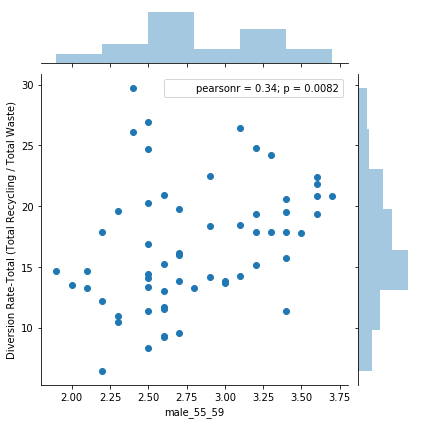

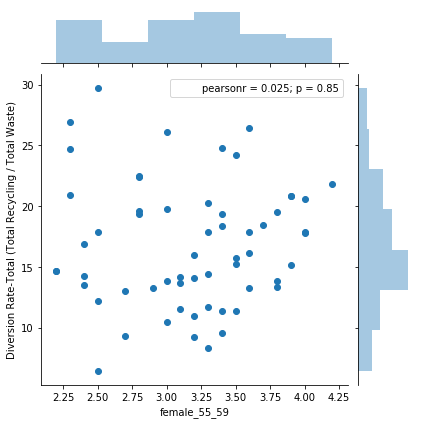

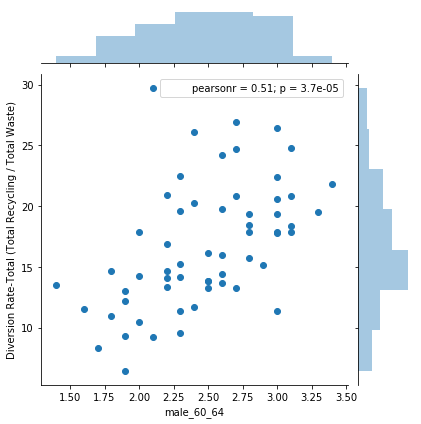

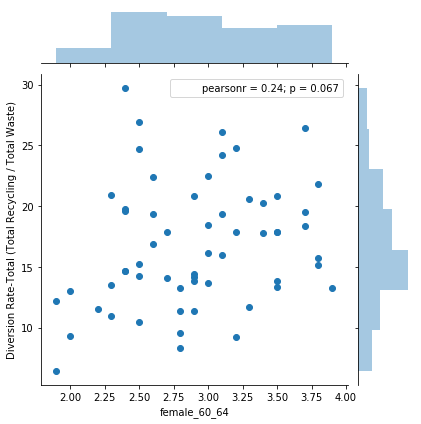

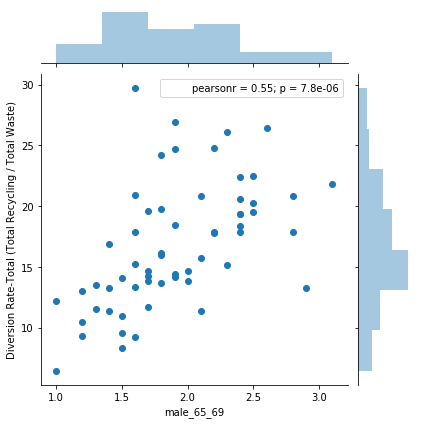

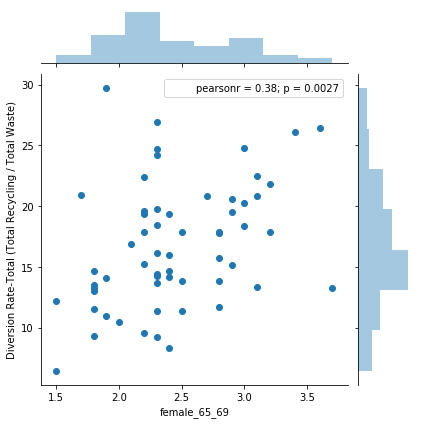

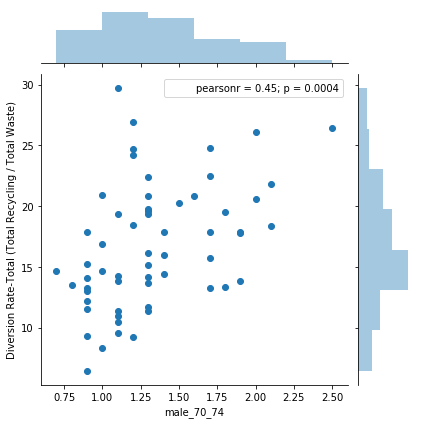

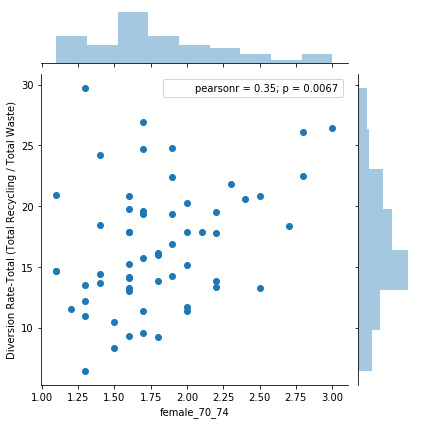

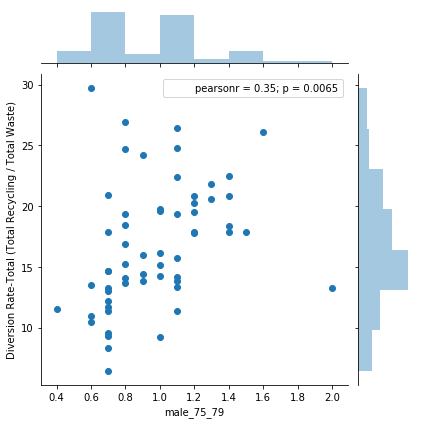

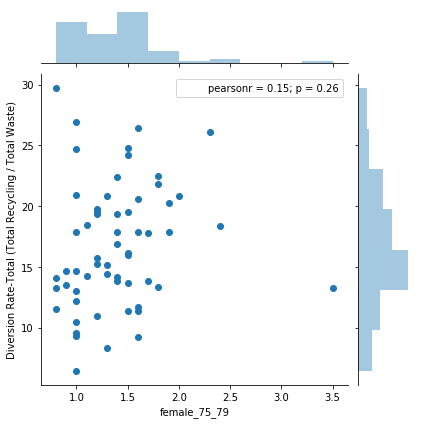

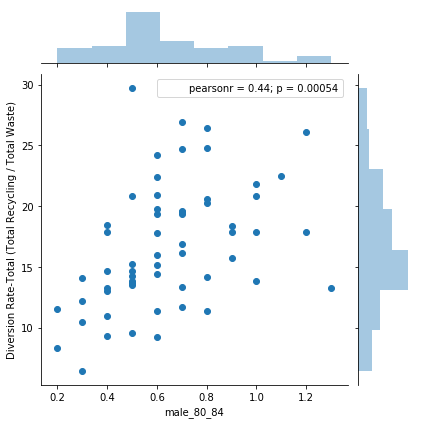

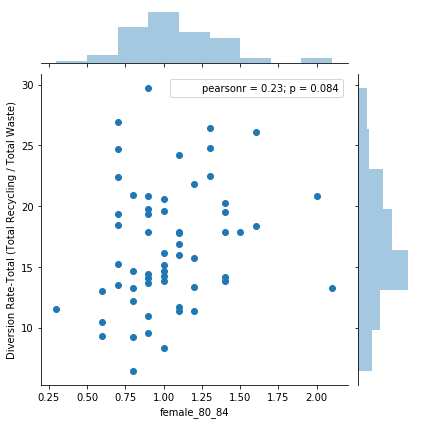

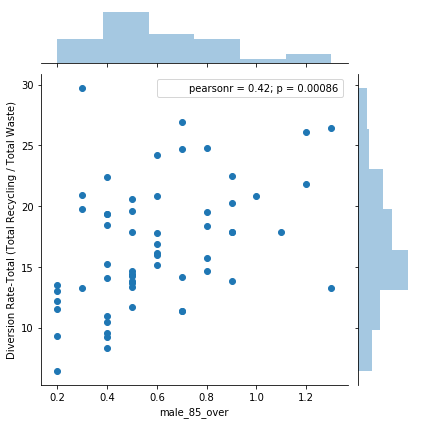

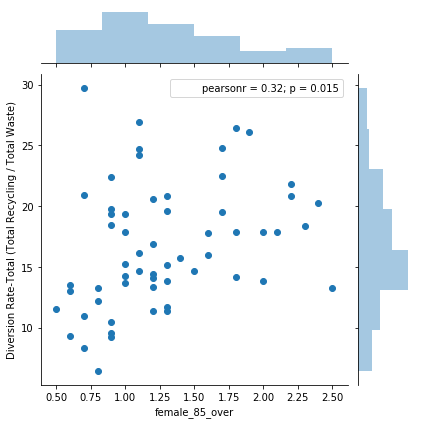

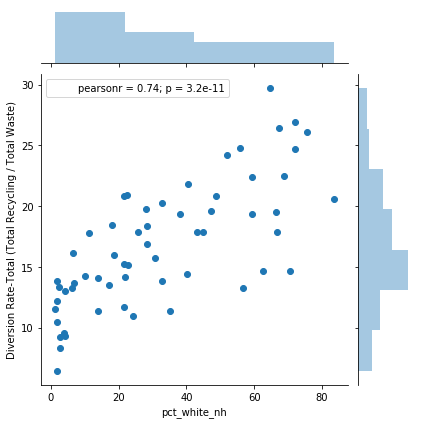

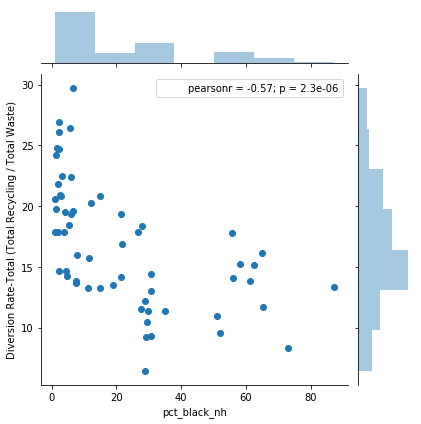

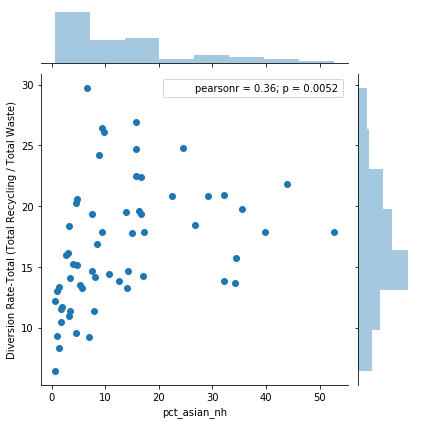

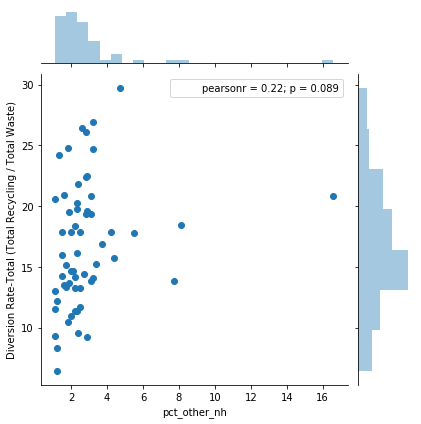

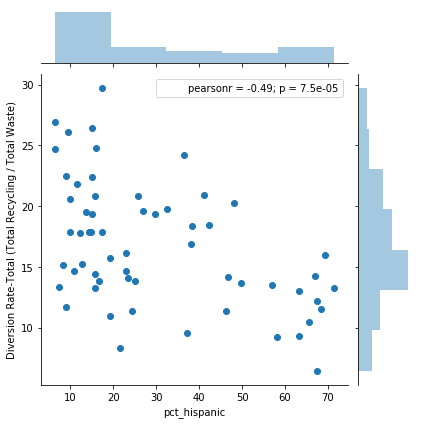

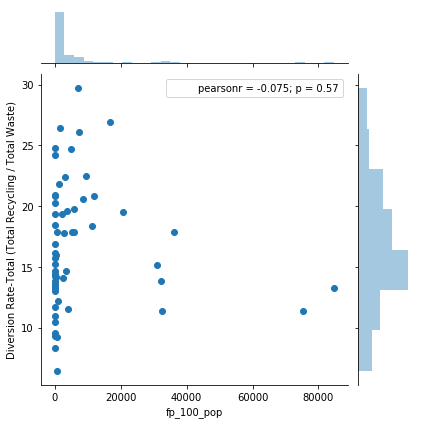

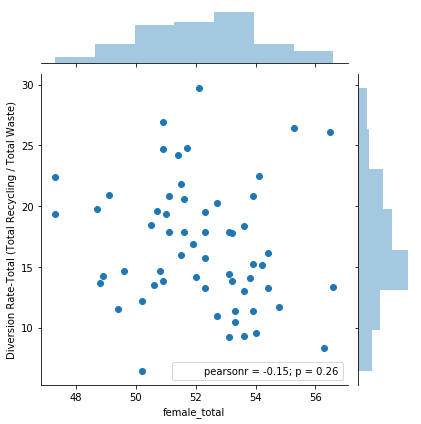

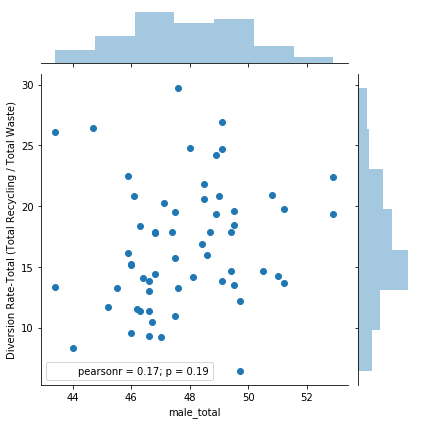

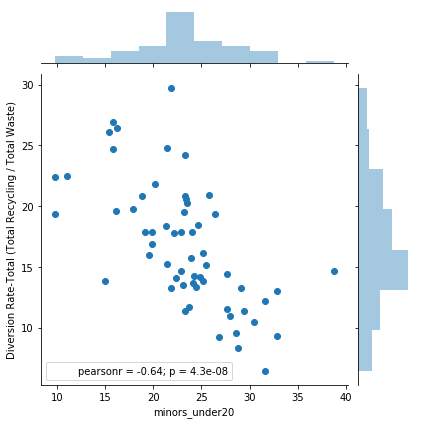

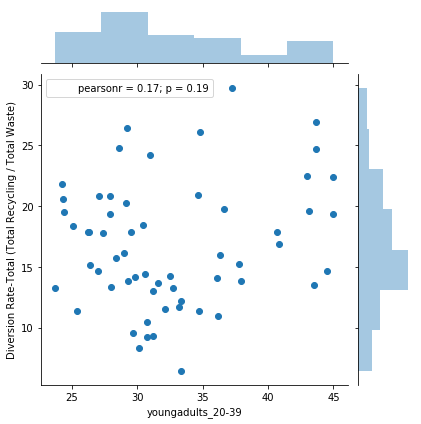

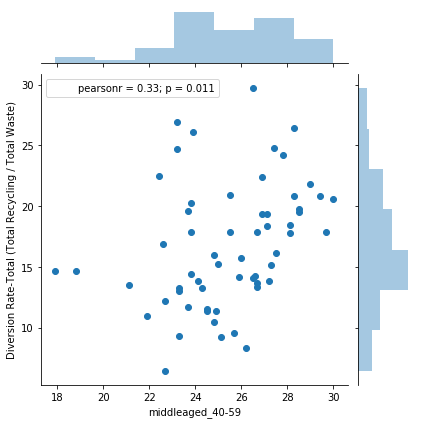

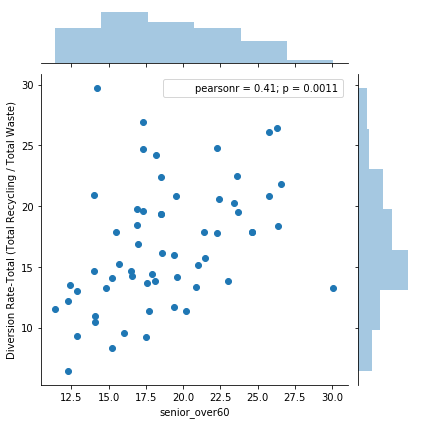

In [47]:
#Jointplots of all variables against Diversion Rates
for i in rec_x_variables:
    sns.jointplot(data=df_2016, x=i, y='Diversion Rate-Total (Total Recycling / Total Waste)', kind='scatter').annotate(stats.pearsonr)
    plt.show()

In [ ]:
#Jointplots of all variables against Total Capture Rates 
for i in rec_x_variables:
    sns.jointplot(data=df_2016, x=i, y='Capture Rate-Total ((Total Recycling - Leaves (Recycling)) / (Max Paper + Max MGP))x100', kind='scatter').annotate(stats.pearsonr)
    plt.show()

/Users/varunraja/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


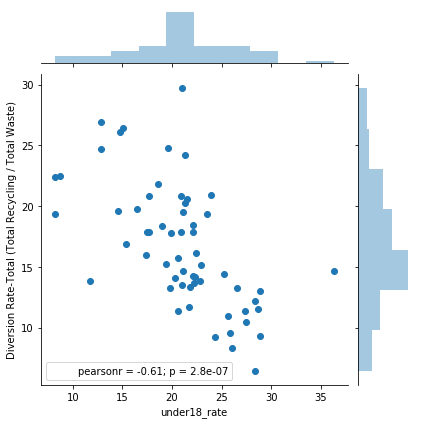

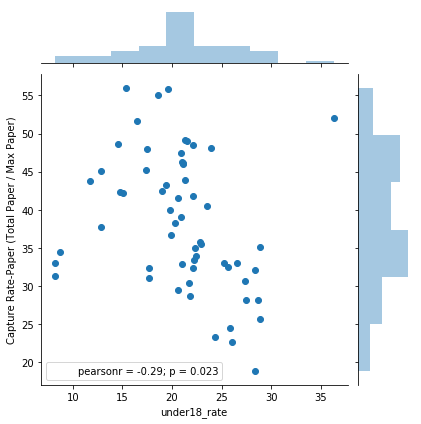

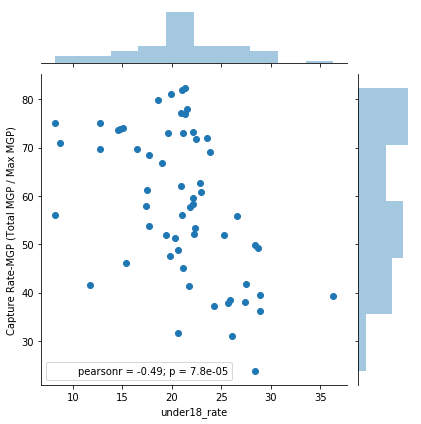

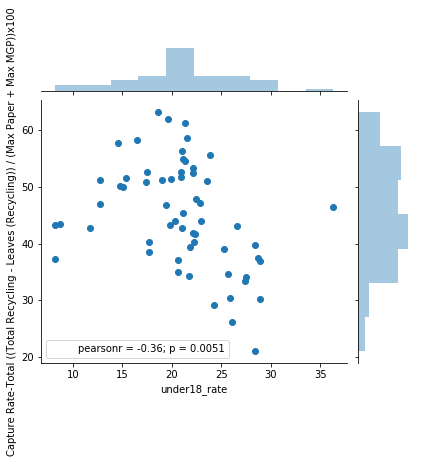

In [46]:
#DISCARD
#EXAMPLE FOR GRAPHING AGAINST RATES
for i in rec_y_rates:
    sns.jointplot(data=df_2016, x='under18_rate', y=i, kind='scatter').annotate(stats.pearsonr)
    plt.show()

In [91]:
#Create list of age groups and their respective correlation to diversion rate
agegroup_list = rec_x_variables[16:52]

#Create dictionary of age groups and pearson correlation 
age_dict = {i:stats.pearsonr(df_2016[i], df_2016['Diversion Rate-Total (Total Recycling / Total Waste)'])[0] for i in agegroup_list}

#Turn dictionary into dataframe in order to create bar graph in order of dictionary
age_corr = pd.DataFrame(age_dict.items(), columns=['Age Group', 'Correlation'])
age_corr.plot(kind='bar', x='Age Group', y='Correlation', figsize=[12,10])
plt.xticks(rotation=90)
plt.show()

NameError: name 'rec_x_variables' is not defined

In [ ]:
#Create dictionary of Pearson Correlation and p-values corresponding to each variable with respect to diversion rate and capture rate
correlation_diversion = {i:stats.pearsonr(df_2016[i], df_2016['Diversion Rate-Total (Total Recycling / Total Waste)']) for i in rec_x_variables}
correlation_capture = {i:stats.pearsonr(df_2016[i], df_2016['Capture Rate-Total ((Total Recycling - Leaves (Recycling)) / (Max Paper + Max MGP))x100']) for i in rec_x_variables}

In [ ]:
#Filter dictionary of all correlation and p-values to only include variables the are statistically significant (p-value less than .05)
diversion_significant = {key:value for key, value in correlation_diversion.items() if value[1] < .05}
capture_significant = {key:value for key, value in correlation_capture.items() if value[1] < .05}
diversion_significant, capture_significant

In [ ]:
#Excluding shorter age ranges, LEP, under18 rate, and count hosp

In [ ]:
#Create sublists of categories of variables - Economic, Community, Race, Age Groups
economic = ['poverty_rate', 'pct_bach_deg', 'unemployment_cd', 'mean_commute']
community = ['pct_hh_rent_burd', 'pct_clean_strts', 'count_public_schools', 'count_hosp_clinic']
race = ['pct_black_nh', 'pct_white_nh', 'pct_hispanic', 'pct_asian_nh']
age = ['minors_under20', 'youngadults_20-39', 'middleaged_40-59', 'senior_over60']
comb_var = economic + community + race + age

In [ ]:
sns.jointplot(data=df_2016, x='pct_bach_deg', y='pct_hh_rent_burd', kind='scatter').annotate(stats.pearsonr)
plt.show()

In [ ]:
corr_list = rec_y_rates + rec_x_variables[0:16] + rec_x_variables[52:]
corr_list

In [ ]:
df_corr = df_2016[comb_var]
df_corr2 = df_2016[rec_y_rates + comb_var]

In [ ]:
#Correlation matrix between each variable 
corr = df_corr.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(df_corr.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(df_corr.columns)
ax.set_yticklabels(df_corr.columns)
plt.show()

In [ ]:
#Correlation matrix between each variable 
corr = df_corr.corr()
fig = plt.figure(figsize=(14,12))
ax = fig.add_subplot(111)
sns.heatmap(corr, annot=True, cmap=plt.cm.coolwarm_r)
plt.tick_params(labeltop=True, labelbottom=False, bottom=False)
plt.xticks(rotation=90)
plt.show()

In [ ]:
#Correlation Matrix including Y-variables (rates) 
corr = df_corr2.corr()
fig = plt.figure(figsize=(15,12))
ax = fig.add_subplot(111)
sns.heatmap(corr, annot=True, cmap=plt.cm.coolwarm_r)
plt.tick_params(labeltop=True, labelbottom=False, bottom=False)
plt.xticks(rotation=90)
plt.show()

In [ ]:
#plot correlation & p-value
#re-do ML with chosen variables
#update lasso algorithm
#Clean up, answer prompts, annotate